In [977]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go    
import plotly.express as px
import missingno as msn

In [978]:
df = pd.read_csv('./Mental Health in Pregnancy During Covid-  19 - Mental Health in Pregnancy During Covid-  19.csv.csv')

In [979]:
df.head(2)

OSF_ID  Maternal_Age Household_Income    Maternal_Education  \
0       1          38.3        $200,000+        Masters degree   
1       2          34.6        $200,000+  Undergraduate degree   

   Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
0                                   9.0            13.0   
1                                   4.0            17.0   

   Gestational_Age_At_Birth Delivery_Date(converted to month and year)  \
0                     39.71                                    Dec2020   
1                       NaN                                        NaN   

   Birth_Length  Birth_Weight Delivery_Mode NICU_Stay Language  Threaten_Life  \
0          49.2        3431.0     Vaginally        No  English            2.0   
1           NaN           NaN           NaN       NaN  English            2.0   

   Threaten_Baby_Danger  Threaten_Baby_Harm  
0                   3.0                27.0  
1                  33.0                92.0

In [980]:
# Shape of the data
df.shape

(10772, 16)

In [981]:
# Check columns
df.columns

Index(['OSF_ID', 'Maternal_Age', 'Household_Income', 'Maternal_Education',
       'Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety',
       'Gestational_Age_At_Birth',
       'Delivery_Date(converted to month and year)', 'Birth_Length',
       'Birth_Weight', 'Delivery_Mode', 'NICU_Stay', 'Language',
       'Threaten_Life', 'Threaten_Baby_Danger', 'Threaten_Baby_Harm'],
      dtype='object')

<Axes: >

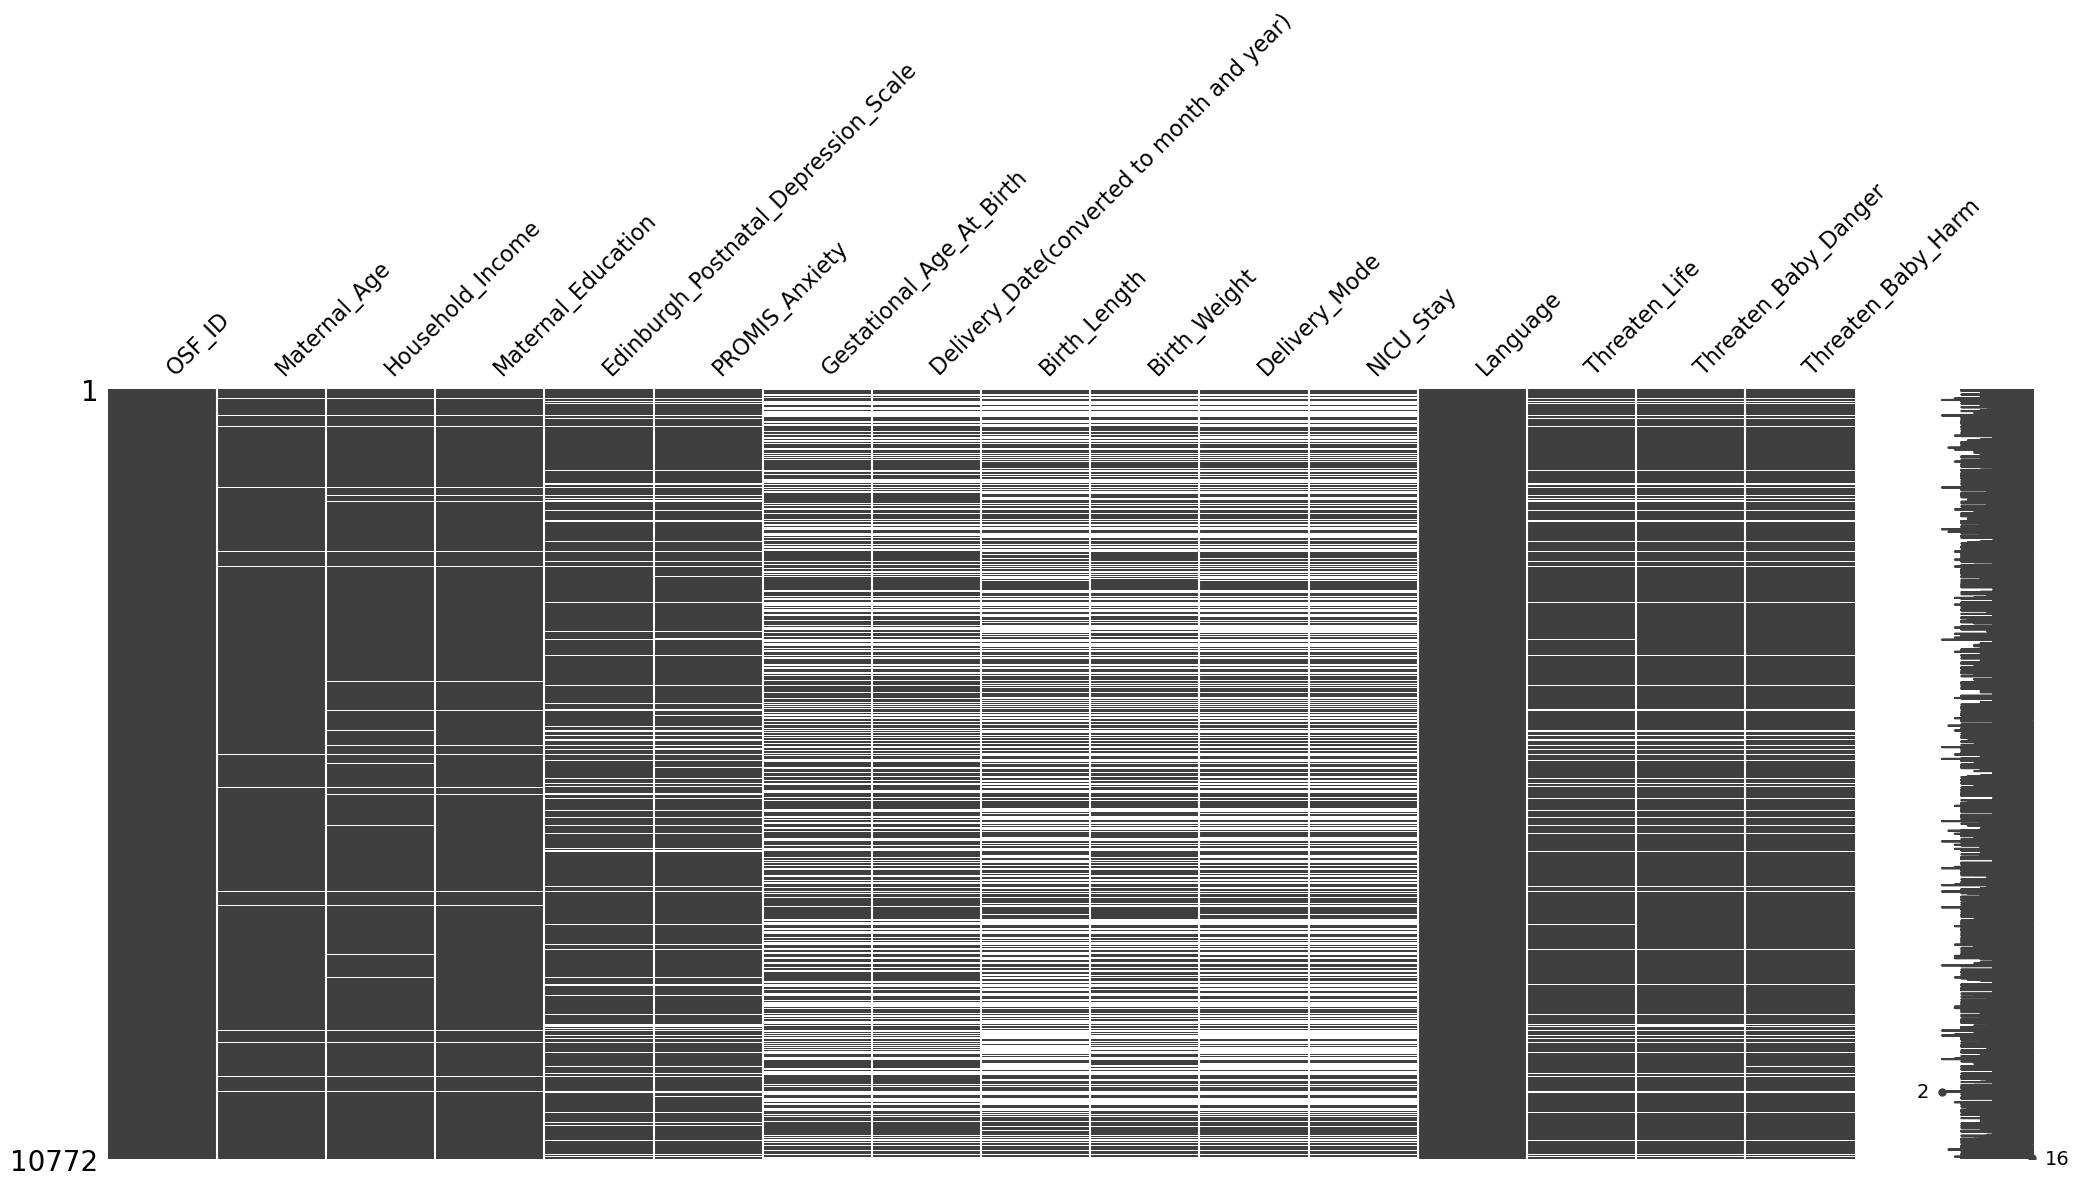

In [982]:
# Plot missing value distribution
msn.matrix(df)

In [983]:
# Missing value table
(df.isnull()
 .mean()*100).reset_index().rename({0:'Missing_Percentage'},axis=1)

index  Missing_Percentage
0                                       OSF_ID            0.000000
1                                 Maternal_Age            1.030449
2                             Household_Income            2.330115
3                           Maternal_Education            1.643149
4         Edinburgh_Postnatal_Depression_Scale           10.898626
5                               PROMIS_Anxiety           11.195693
6                     Gestational_Age_At_Birth           37.486075
7   Delivery_Date(converted to month and year)           37.495358
8                                 Birth_Length           49.127367
9                                 Birth_Weight           43.575938
10                               Delivery_Mode           48.598218
11                                   NICU_Stay           48.626068
12                                    Language            0.000000
13                               Threaten_Life            8.317861
14                        Threaten_Baby_Danger            8.392128
15                          Threaten_Baby_Harm            8.280728

In [984]:
# set index osf_id
df.set_index('OSF_ID',inplace=True)

In [985]:
# Check duplicates
df.duplicated().sum()

30

In [986]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [987]:
df.head()

Maternal_Age    Household_Income    Maternal_Education  \
OSF_ID                                                           
1               38.3           $200,000+        Masters degree   
2               34.6           $200,000+  Undergraduate degree   
3               34.3  $100,000 -$124,999  Undergraduate degree   
4               28.8  $100,000 -$124,999        Masters degree   
5               36.5     $40,000-$69,999  Undergraduate degree   

        Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
OSF_ID                                                         
1                                        9.0            13.0   
2                                        4.0            17.0   
3                                        NaN             NaN   
4                                        9.0            20.0   
5                                       14.0            20.0   

        Gestational_Age_At_Birth Delivery_Date(converted to month and year)  \
OSF_ID                                                                        
1                          39.71                                    Dec2020   
2                            NaN                                        NaN   
3                            NaN                                        NaN   
4                          38.57                                    Dec2020   
5                          39.86                                    Oct2020   

        Birth_Length  Birth_Weight                  Delivery_Mode NICU_Stay  \
OSF_ID                                                                        
1              49.20        3431.0                      Vaginally        No   
2                NaN           NaN                            NaN       NaN   
3                NaN           NaN                            NaN       NaN   
4              41.00        2534.0                      Vaginally        No   
5              53.34        3714.0  Caesarean-section (c-section)        No   

       Language  Threaten_Life  Threaten_Baby_Danger  Threaten_Baby_Harm  
OSF_ID                                                                    
1       English            2.0                   3.0                27.0  
2       English            2.0                  33.0                92.0  
3        French            NaN                   NaN                 NaN  
4        French           53.0                  67.0                54.0  
5       English           23.0                  32.0                71.0

In [988]:
# Univariate analysis
df['Delivary_month'] = df['Delivery_Date(converted to month and year)'].str.extract(pat='(\D*)',expand=False)
df['Delivary_year'] = df['Delivery_Date(converted to month and year)'].str.extract(pat='(\d+)',expand=False)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1864\800614423.py:2: SyntaxWarning: invalid escape sequence '\D'
  df['Delivary_month'] = df['Delivery_Date(converted to month and year)'].str.extract(pat='(\D*)',expand=False)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1864\800614423.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['Delivary_year'] = df['Delivery_Date(converted to month and year)'].str.extract(pat='(\d+)',expand=False)


In [989]:
# Drop that co
df.drop(columns='Delivery_Date(converted to month and year)',inplace=True)

In [990]:
df

Maternal_Age    Household_Income    Maternal_Education  \
OSF_ID                                                           
1               38.3           $200,000+        Masters degree   
2               34.6           $200,000+  Undergraduate degree   
3               34.3  $100,000 -$124,999  Undergraduate degree   
4               28.8  $100,000 -$124,999        Masters degree   
5               36.5     $40,000-$69,999  Undergraduate degree   
...              ...                 ...                   ...   
10768           38.3  $100,000 -$124,999  Undergraduate degree   
10769           29.9  $125,000- $149,999  Undergraduate degree   
10770           27.7    $20,000- $39,999  College/trade school   
10771           23.0    $20,000- $39,999  College/trade school   
10772           34.6     $70,000-$99,999        Masters degree   

        Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
OSF_ID                                                         
1                                        9.0            13.0   
2                                        4.0            17.0   
3                                        NaN             NaN   
4                                        9.0            20.0   
5                                       14.0            20.0   
...                                      ...             ...   
10768                                   10.0            18.0   
10769                                    NaN             NaN   
10770                                    4.0            15.0   
10771                                   12.0            19.0   
10772                                   18.0            30.0   

        Gestational_Age_At_Birth  Birth_Length  Birth_Weight  \
OSF_ID                                                         
1                          39.71         49.20        3431.0   
2                            NaN           NaN           NaN   
3                            NaN           NaN           NaN   
4                          38.57         41.00        2534.0   
5                          39.86         53.34        3714.0   
...                          ...           ...           ...   
10768                        NaN           NaN           NaN   
10769                        NaN           NaN           NaN   
10770                        NaN           NaN           NaN   
10771                        NaN           NaN           NaN   
10772                      38.29           NaN        4196.0   

                        Delivery_Mode NICU_Stay Language  Threaten_Life  \
OSF_ID                                                                    
1                           Vaginally        No  English            2.0   
2                                 NaN       NaN  English            2.0   
3                                 NaN       NaN   French            NaN   
4                           Vaginally        No   French           53.0   
5       Caesarean-section (c-section)        No  English           23.0   
...                               ...       ...      ...            ...   
10768                             NaN       NaN  English           54.0   
10769                             NaN       NaN  English            NaN   
10770                             NaN       NaN   French           21.0   
10771                             NaN       NaN  English           65.0   
10772                             NaN       NaN  English           84.0   

        Threaten_Baby_Danger  Threaten_Baby_Harm Delivary_month Delivary_year  
OSF_ID                                                                         
1                        3.0                27.0            Dec          2020  
2                       33.0                92.0            NaN           NaN  
3                        NaN                 NaN            NaN           NaN  
4                       67.0                54.0            Dec          2020  
5                       32.

In [991]:
# Extract numercal columns
numerical_columns = df.select_dtypes(include='number').columns

In [992]:
numerical_columns

Index(['Maternal_Age', 'Edinburgh_Postnatal_Depression_Scale',
       'PROMIS_Anxiety', 'Gestational_Age_At_Birth', 'Birth_Length',
       'Birth_Weight', 'Threaten_Life', 'Threaten_Baby_Danger',
       'Threaten_Baby_Harm'],
      dtype='object')

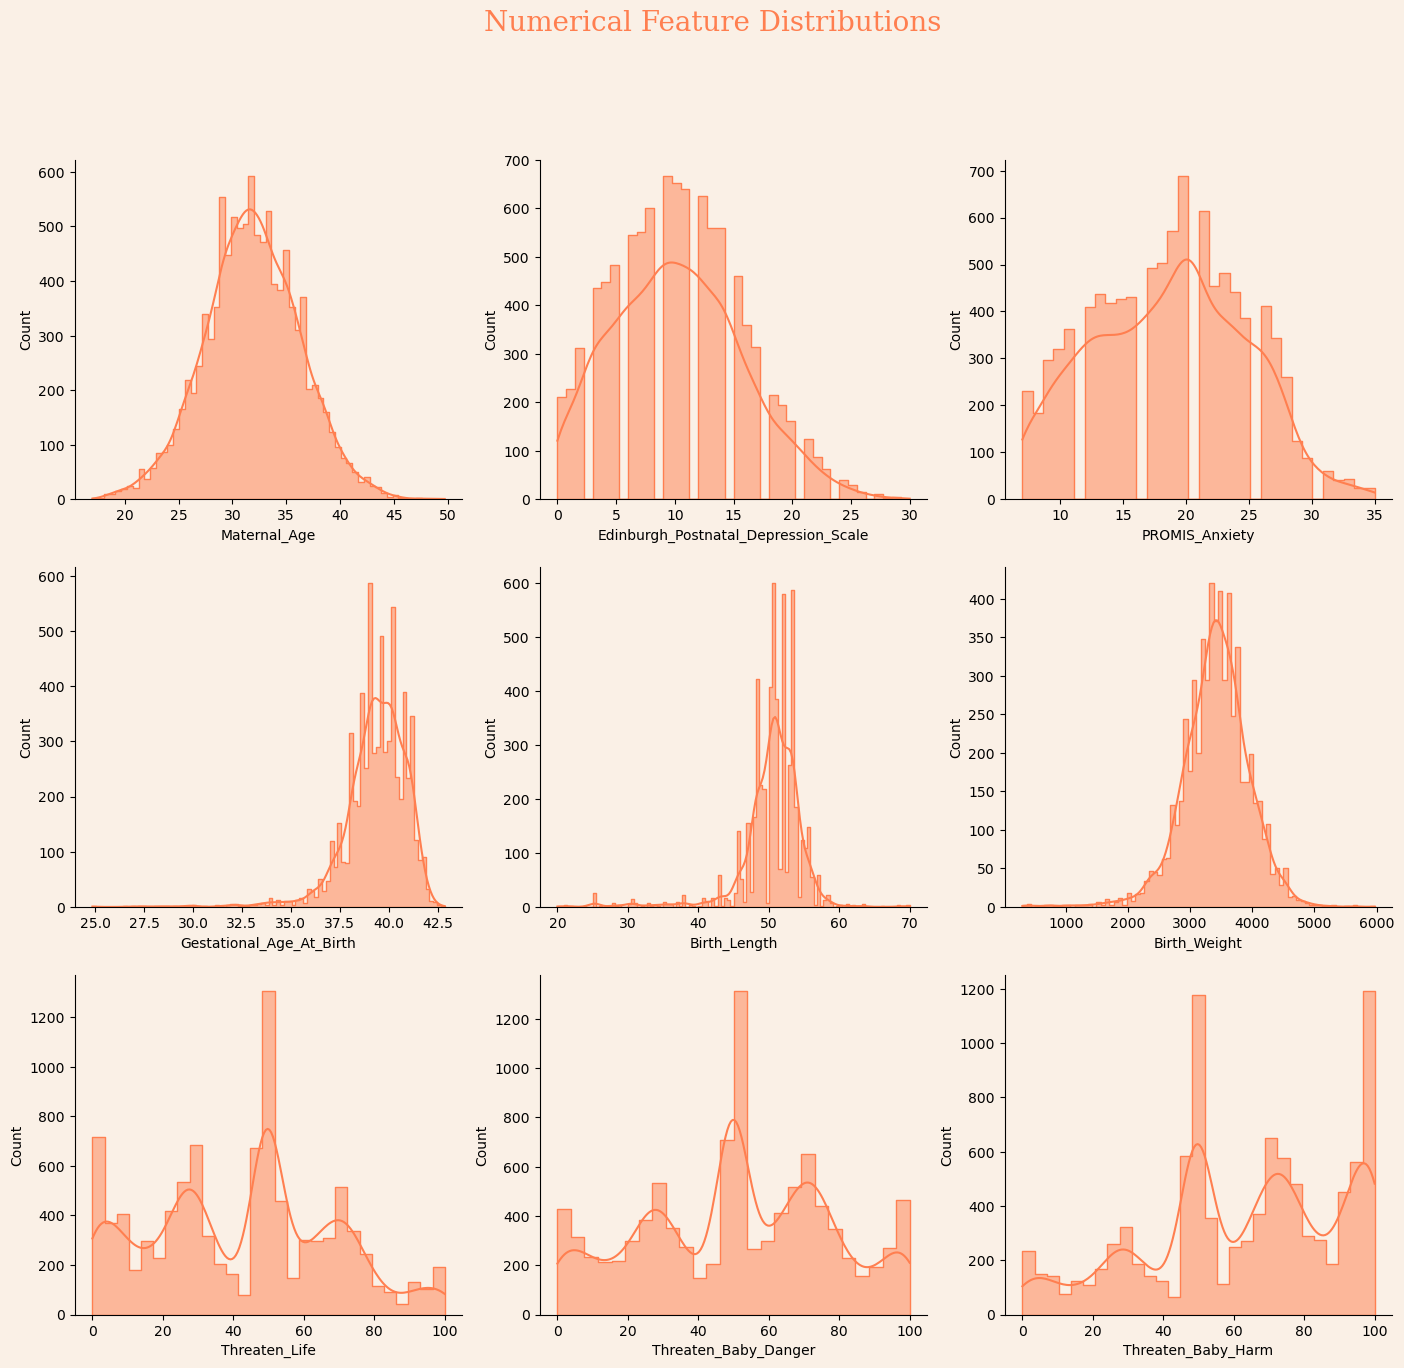

In [993]:
fig, ax = plt.subplots(3,3,figsize=(17,15),facecolor='linen')
ax = ax.flatten()
for axes_number,column in zip(range(len(numerical_columns)),numerical_columns):
    sns.histplot(df[column],ax=ax[axes_number],color='coral',element='step',kde=True)
    ax[axes_number].set_facecolor('linen')
    ax[axes_number].spines[['top','right']].set_visible(False)
fig.suptitle('Numerical Feature Distributions',size=20,fontdict={'fontfamily':'serif','color':'coral'})


plt.show()


In [994]:
# Check catogorical data
def describe_catogorical_data(data):
    print(f'{data.name} Descriptions & Information')
    print('#'*40)
    print(f'Unique Values in {data.name}',data.unique().tolist())
    print('#'*40)
    print(f'Value Counts in {data.name}')
    print(data.value_counts())
    print('#'*40)
    print()
    print()

In [995]:
cat_features = [feature for feature in df.columns if df[feature].nunique()<13]
for feature in cat_features:
    describe_catogorical_data(df[feature])

Household_Income Descriptions & Information
########################################
Unique Values in Household_Income ['$200,000+', '$100,000 -$124,999', '$40,000-$69,999', '$150,000 - $174,999', nan, '$70,000-$99,999', '$125,000- $149,999', '$175,000- $199,999', '$20,000- $39,999', 'Less than $20, 000']
########################################
Value Counts in Household_Income
Household_Income
$70,000-$99,999        2089
$100,000 -$124,999     1955
$40,000-$69,999        1429
$125,000- $149,999     1362
$150,000 - $174,999    1139
$200,000+              1008
$175,000- $199,999      655
$20,000- $39,999        610
Less than $20, 000      260
Name: count, dtype: int64
########################################


Maternal_Education Descriptions & Information
########################################
Unique Values in Maternal_Education ['Masters degree', 'Undergraduate degree', 'High school diploma', nan, 'College/trade school', 'Less than high school diploma', 'Doctoral Degree']
###########

In [996]:
# Multivariate Analysis
df.groupby('Household_Income')[['Edinburgh_Postnatal_Depression_Scale','PROMIS_Anxiety','Gestational_Age_At_Birth','Threaten_Life','Threaten_Baby_Danger','Threaten_Baby_Harm']].agg('mean')


Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
Household_Income                                                            
$100,000 -$124,999                               9.838692       18.493862   
$125,000- $149,999                               9.710273       18.211245   
$150,000 - $174,999                              9.116387       17.623364   
$175,000- $199,999                               8.918434       17.619281   
$20,000- $39,999                                12.819231       20.673745   
$200,000+                                        8.879365       17.628178   
$40,000-$69,999                                 11.590727       19.810897   
$70,000-$99,999                                 10.527070       19.042088   
Less than $20, 000                              13.215686       21.315271   

                     Gestational_Age_At_Birth  Threaten_Life  \
Household_Income                                               
$100,000 -$124,999                  39.418150      41.783813   
$125,000- $149,999                  39.348467      40.482463   
$150,000 - $174,999                 39.405695      41.392463   
$175,000- $199,999                  39.449642      40.062300   
$20,000- $39,999                    39.134360      47.727106   
$200,000+                           39.206848      39.456635   
$40,000-$69,999                     39.282923      45.215491   
$70,000-$99,999                     39.378748      42.388205   
Less than $20, 000                  38.983462      50.771028   

                     Threaten_Baby_Danger  Threaten_Baby_Harm  
Household_Income                                               
$100,000 -$124,999              50.288200           62.386327  
$125,000- $149,999              48.904762           62.027301  
$150,000 - $174,999             48.456382           59.983501  
$175,000- $199,999              46.923200           60.517572  
$20,000- $39,999                58.310786           66.718464  
$200,000+                       46.885057           60.134937  
$40,000-$69,999                 53.740031           63.476263  
$70,000-$99,999                 52.033933           63.633470  
Less than $20, 000              60.276995           66.985915

In [997]:
# drop all the row whereall the threat score in null , since it is tha main thing we are anlaysing
df = df.dropna(subset=['Threaten_Life','Threaten_Baby_Danger','Threaten_Baby_Harm'],how='all')

In [998]:
# Convert birth week to month
df['Gestational_Age_At_Birth'] =  df.Gestational_Age_At_Birth/(31/7)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1864\3329114887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gestational_Age_At_Birth'] =  df.Gestational_Age_At_Birth/(31/7)


In [999]:
df

Maternal_Age     Household_Income    Maternal_Education  \
OSF_ID                                                            
1               38.3            $200,000+        Masters degree   
2               34.6            $200,000+  Undergraduate degree   
4               28.8   $100,000 -$124,999        Masters degree   
5               36.5      $40,000-$69,999  Undergraduate degree   
6               38.3  $150,000 - $174,999  Undergraduate degree   
...              ...                  ...                   ...   
10767           32.7      $70,000-$99,999   High school diploma   
10768           38.3   $100,000 -$124,999  Undergraduate degree   
10770           27.7     $20,000- $39,999  College/trade school   
10771           23.0     $20,000- $39,999  College/trade school   
10772           34.6      $70,000-$99,999        Masters degree   

        Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
OSF_ID                                                         
1                                        9.0            13.0   
2                                        4.0            17.0   
4                                        9.0            20.0   
5                                       14.0            20.0   
6                                        3.0             8.0   
...                                      ...             ...   
10767                                   15.0            27.0   
10768                                   10.0            18.0   
10770                                    4.0            15.0   
10771                                   12.0            19.0   
10772                                   18.0            30.0   

        Gestational_Age_At_Birth  Birth_Length  Birth_Weight  \
OSF_ID                                                         
1                       8.966774         49.20        3431.0   
2                            NaN           NaN           NaN   
4                       8.709355         41.00        2534.0   
5                       9.000645         53.34        3714.0   
6                       8.709355           NaN           NaN   
...                          ...           ...           ...   
10767                        NaN           NaN           NaN   
10768                        NaN           NaN           NaN   
10770                        NaN           NaN           NaN   
10771                        NaN           NaN           NaN   
10772                   8.646129           NaN        4196.0   

                        Delivery_Mode NICU_Stay Language  Threaten_Life  \
OSF_ID                                                                    
1                           Vaginally        No  English            2.0   
2                                 NaN       NaN  English            2.0   
4                           Vaginally        No   French           53.0   
5       Caesarean-section (c-section)        No  English           23.0   
6                                 NaN       NaN  English           29.0   
...                               ...       ...      ...            ...   
10767                             NaN       NaN  English           54.0   
10768                             NaN       NaN  English           54.0   
10770                             NaN       NaN   French           21.0   
10771                             NaN       NaN  English           65.0   
10772                             NaN       NaN  English           84.0   

        Threaten_Baby_Danger  Threaten_Baby_Harm Delivary_month Delivary_year  
OSF_ID                                                                         
1                        3.0                27.0            Dec          2020  
2                       33.0                92.0            NaN           NaN  
4                       67.0                54.0            Dec          2020  
5                       32.0                71.0            Oct          2020  
6             

In [1000]:
df['Household_Income'] = (df['Household_Income'].astype('category')
                          .cat.reorder_categories(['Less than $20, 000',
                                                   '$20,000- $39,999',
                                                   '$40,000-$69,999',
                                                   '$70,000-$99,999',
                                                  '$100,000 -$124,999',
                                                  '$125,000- $149,999',
                                                  '$150,000 - $174,999',
                                                  '$175,000- $199,999',
                                                  '$200,000+']
                                                    , ordered=True))

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1864\665571725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Household_Income'] = (df['Household_Income'].astype('category')


In [1001]:
df['Maternal_Education'].unique()

array(['Masters degree', 'Undergraduate degree', 'High school diploma',
       'College/trade school', 'Less than high school diploma',
       'Doctoral Degree', nan], dtype=object)

In [1002]:
df['Maternal_Education'] = (df['Maternal_Education'].astype('category').cat.reorder_categories(['Less than high school diploma','High school diploma','College/trade school','Undergraduate degree','Masters degree','Doctoral Degree'], ordered=True))

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1864\725694715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Maternal_Education'] = (df['Maternal_Education'].astype('category').cat.reorder_categories(['Less than high school diploma','High school diploma','College/trade school','Undergraduate degree','Masters degree','Doctoral Degree'], ordered=True))


In [1003]:
df['Delivary_month'] = (df['Delivary_month'].astype('category')
                          .cat.reorder_categories(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True))

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1864\863825594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delivary_month'] = (df['Delivary_month'].astype('category')


In [1004]:
df.Delivary_month.unique()

['Dec', NaN, 'Oct', 'Jun', 'Nov', ..., 'Aug', 'Jul', 'Sep', 'May', 'Feb']
Length: 13
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [1005]:
cat_columns = ['Household_Income','Maternal_Education','Delivery_Mode','NICU_Stay','Delivary_month','Delivary_year']


In [1006]:
numerical_columns = ['Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety','Threaten_Life',
       'Threaten_Baby_Danger', 'Threaten_Baby_Harm']


In [1007]:
def cat_lineplot(x,y):
    plt.figure(figsize=(15,4),facecolor='#C1D8C370')
    ax = sns.lineplot(data=df,x=x,y=y,color='#0D7C6680')
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left','bottom']].set_alpha(0.4)
    plt.xticks(rotation=40)
    ax.set_facecolor('#C1D8C350')
    plt.title(f'{x} AND {y}',fontdict={'fontfamily':'serif'})
    ax.tick_params(direction='in', length=3, width=1,color='red',labelcolor='g')
    plt.show()

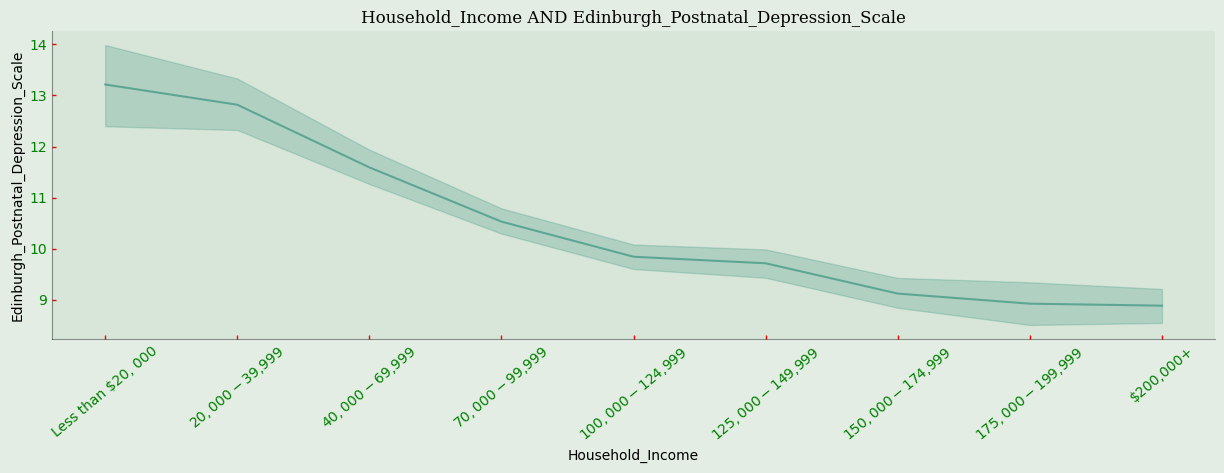

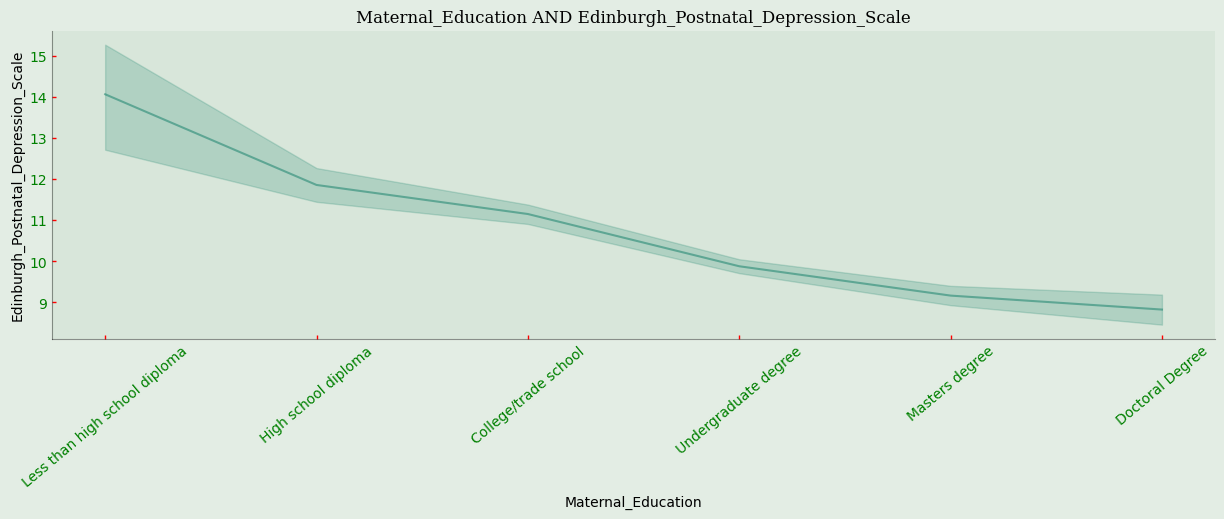

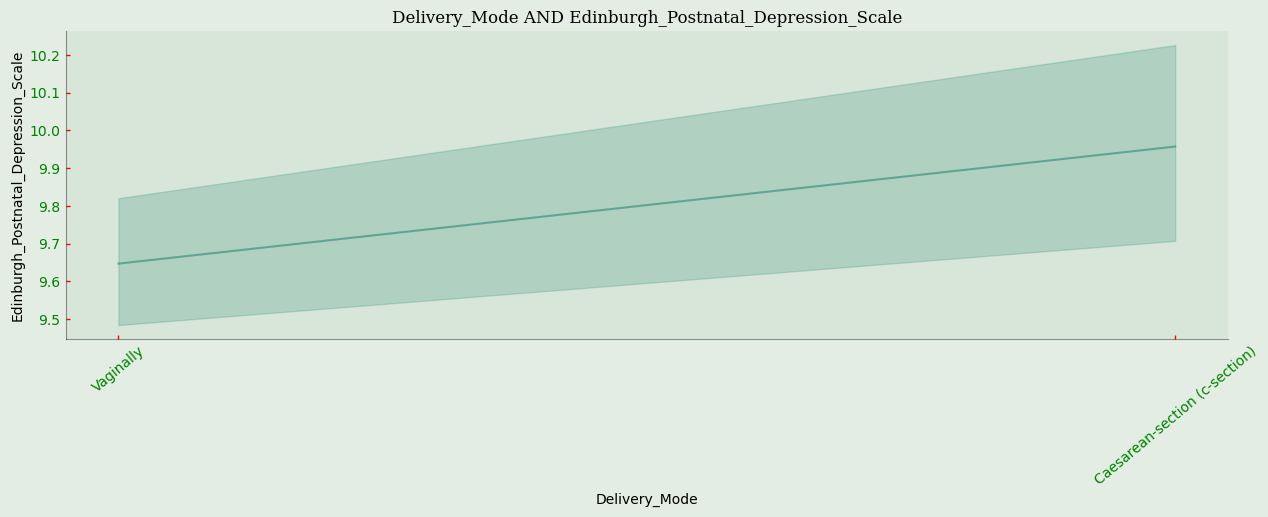

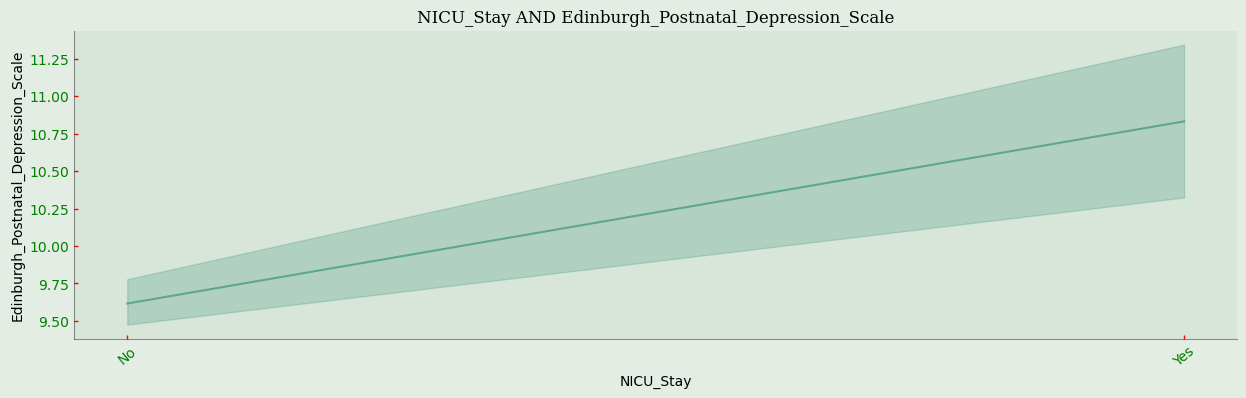

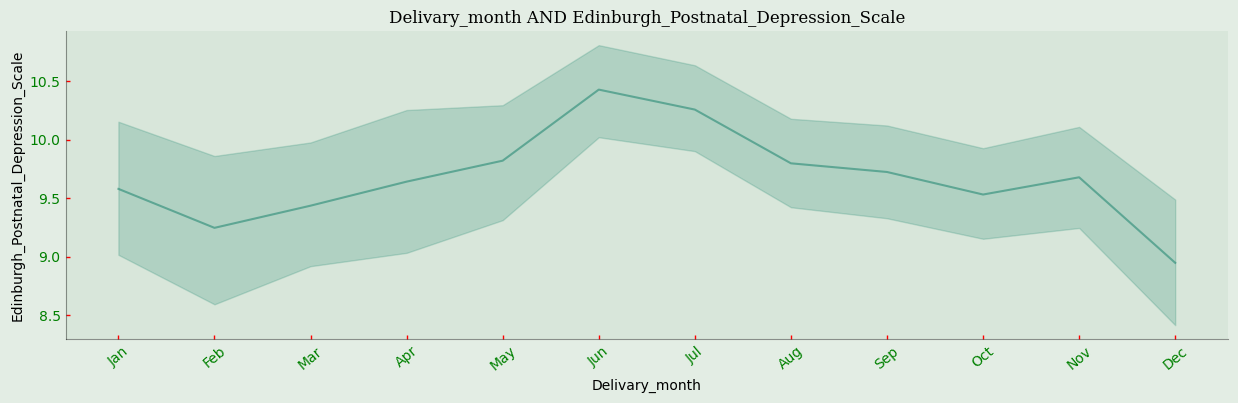

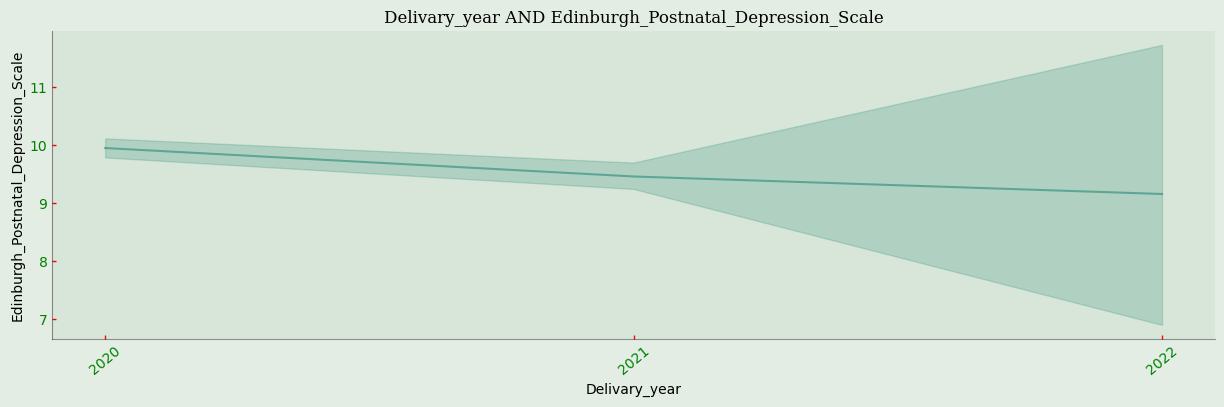

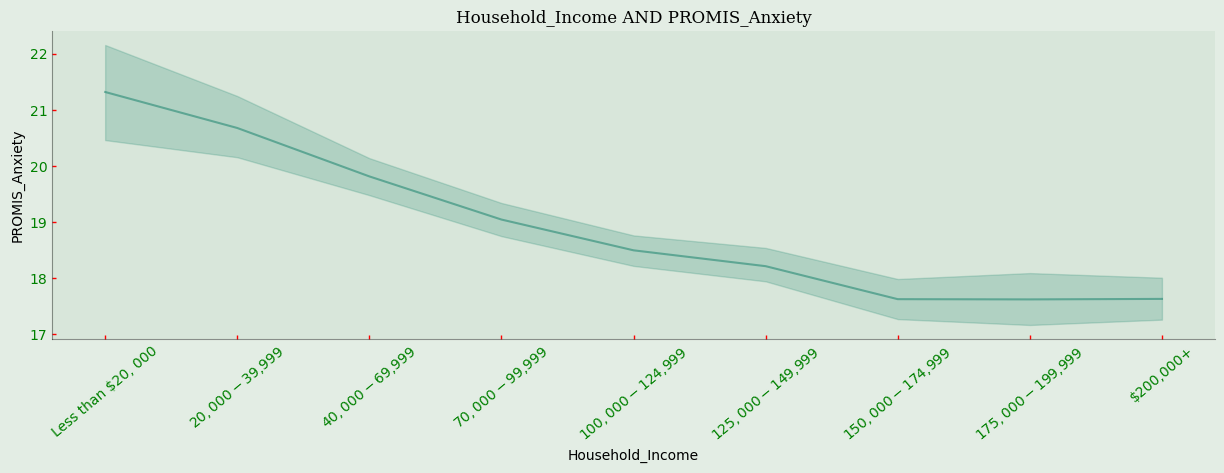

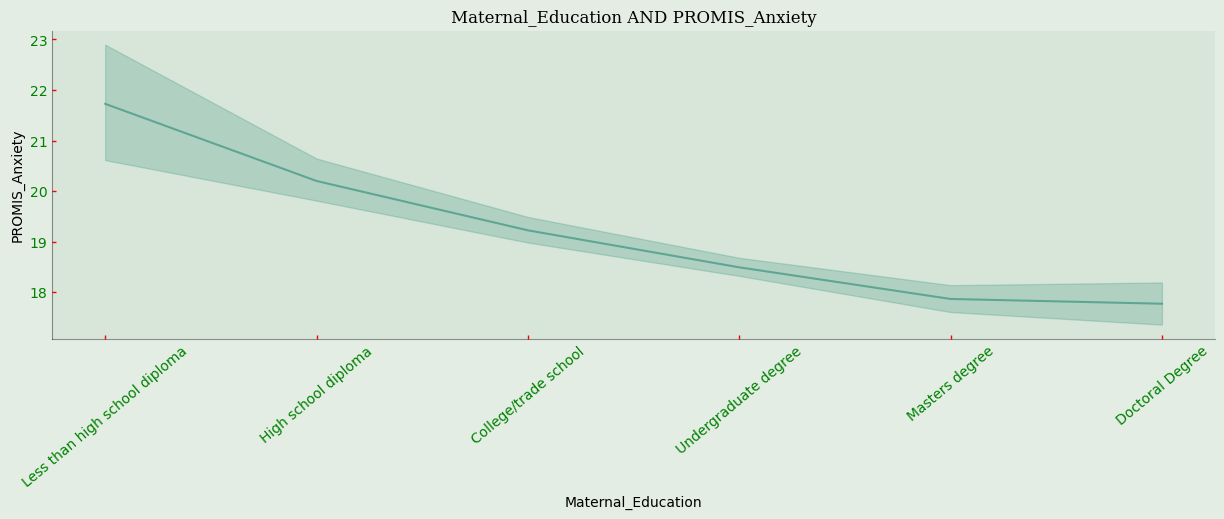

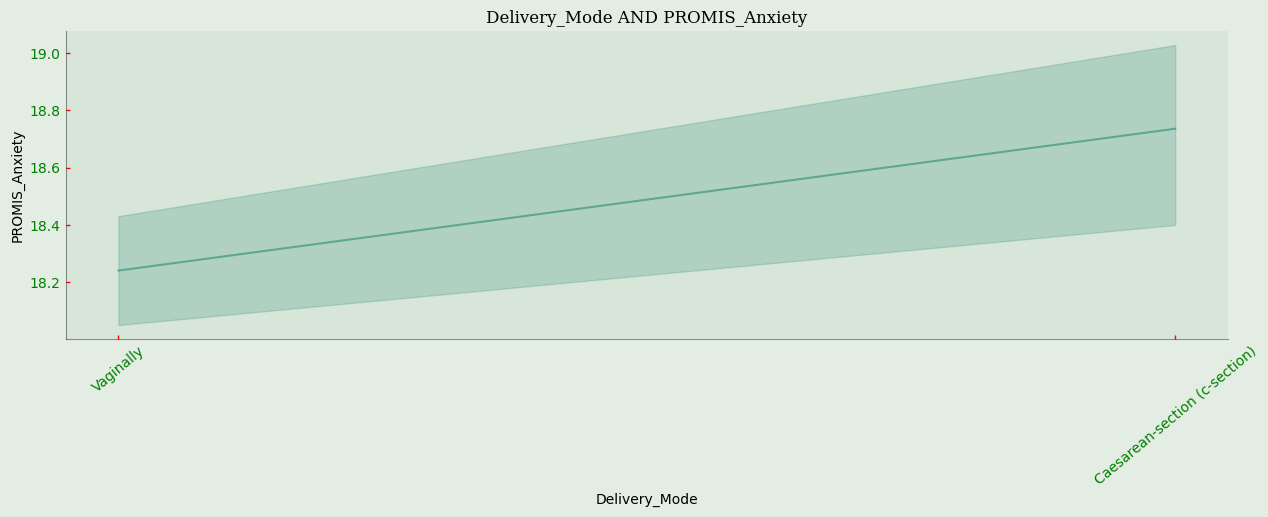

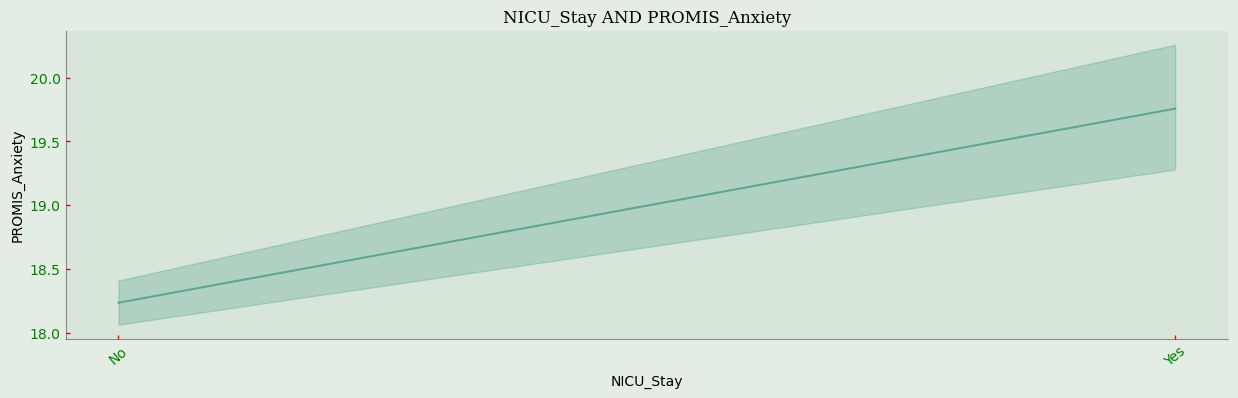

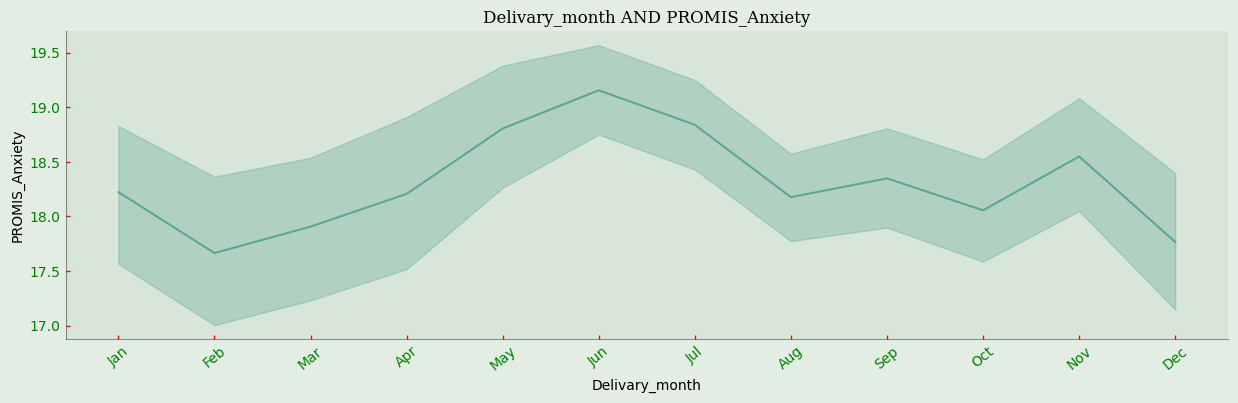

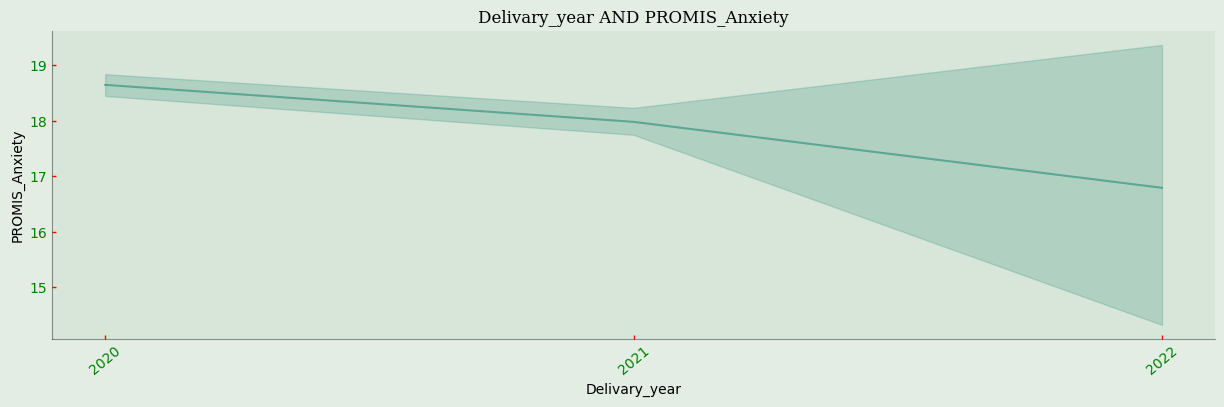

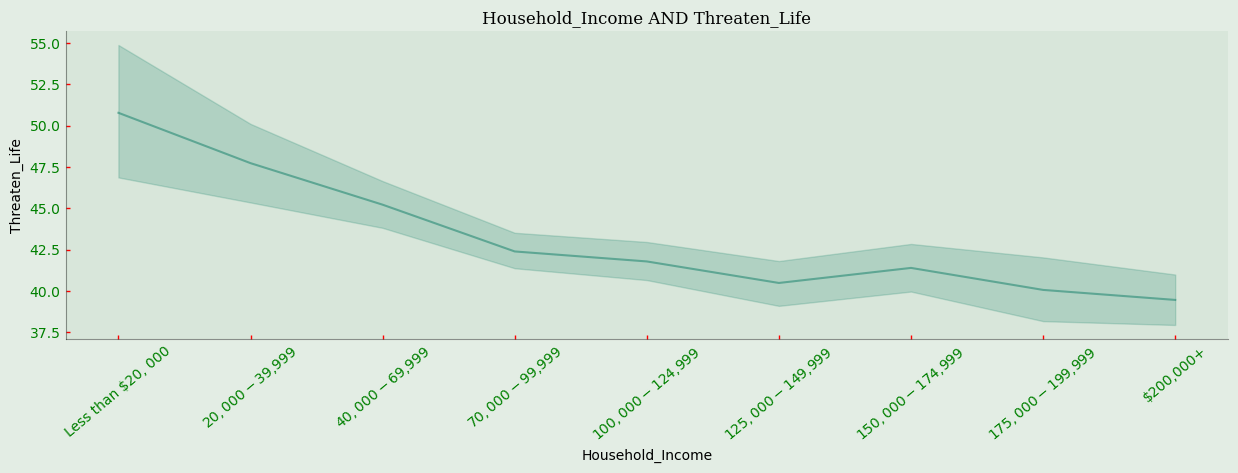

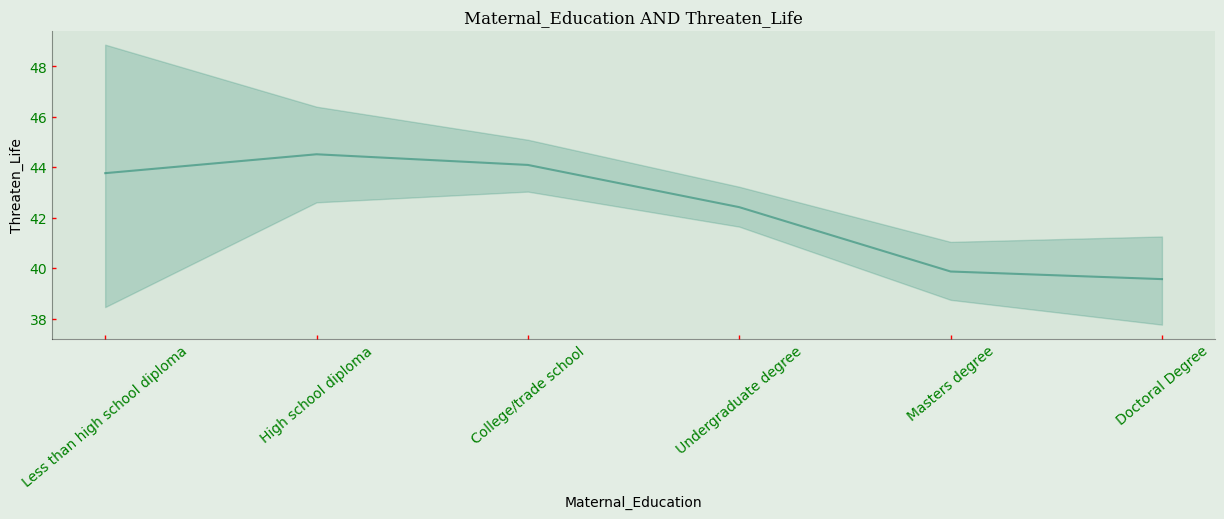

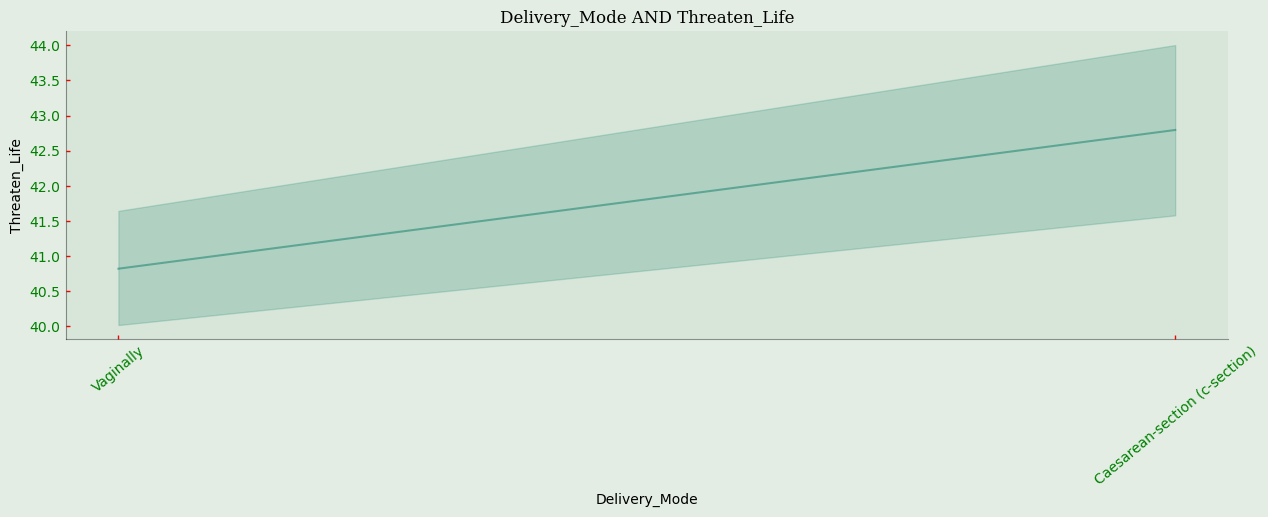

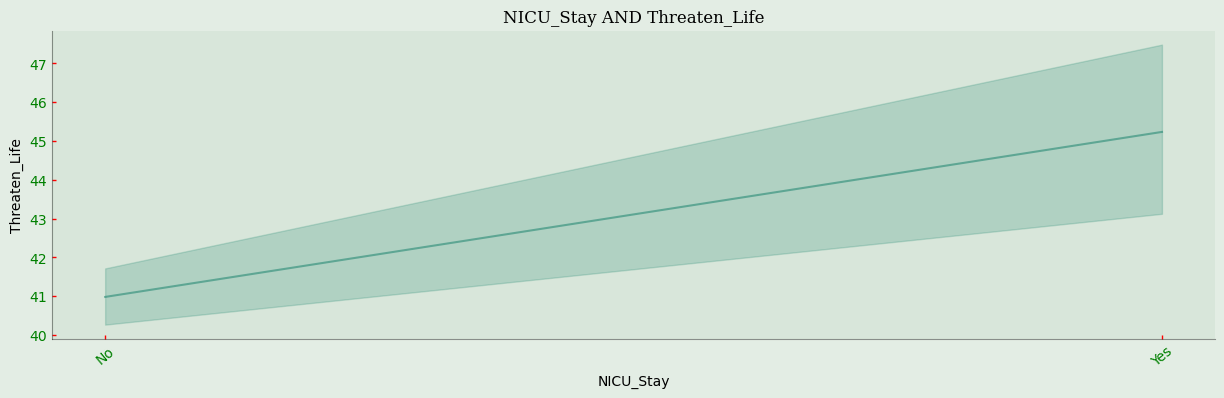

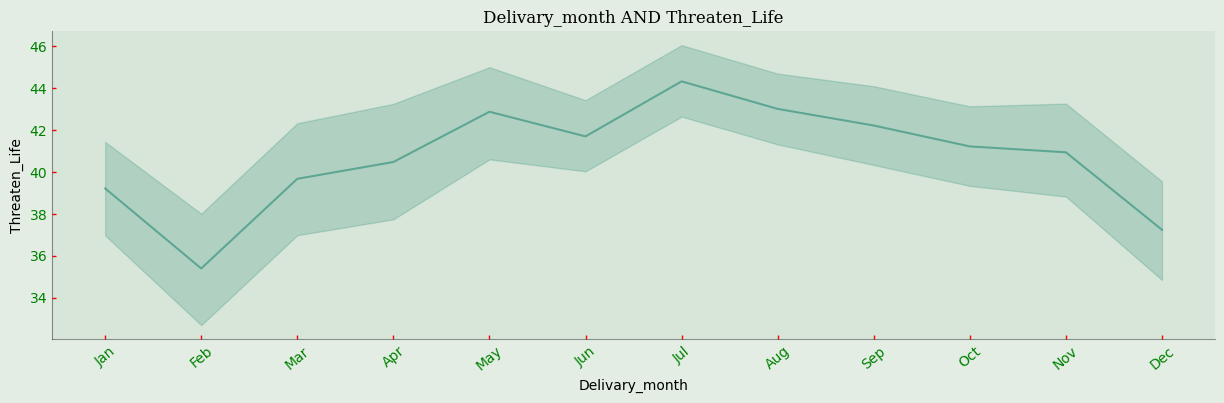

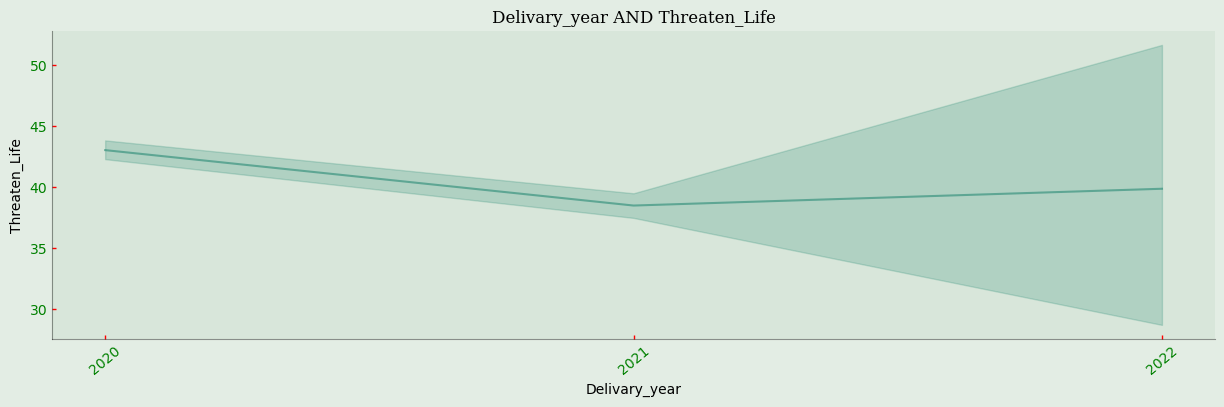

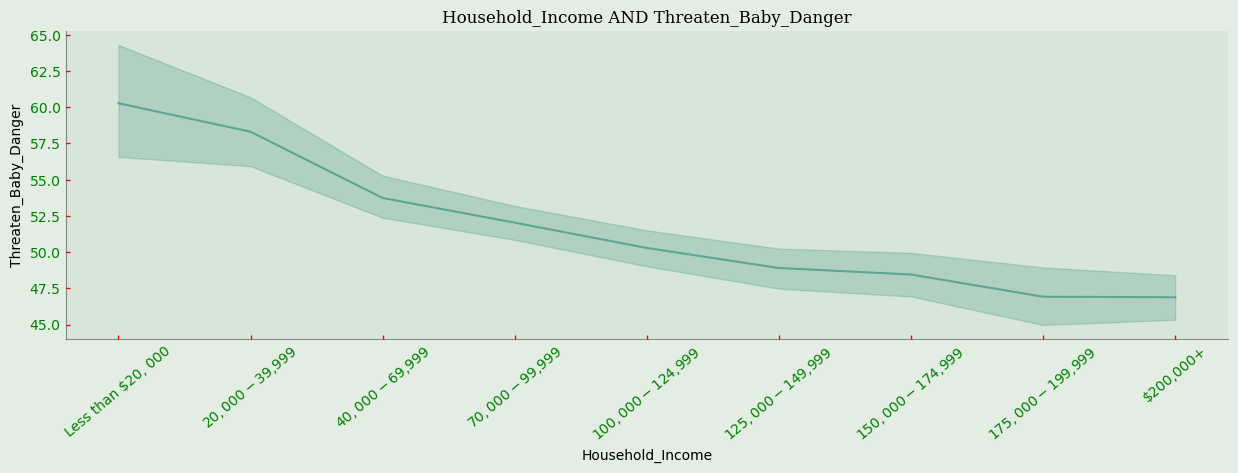

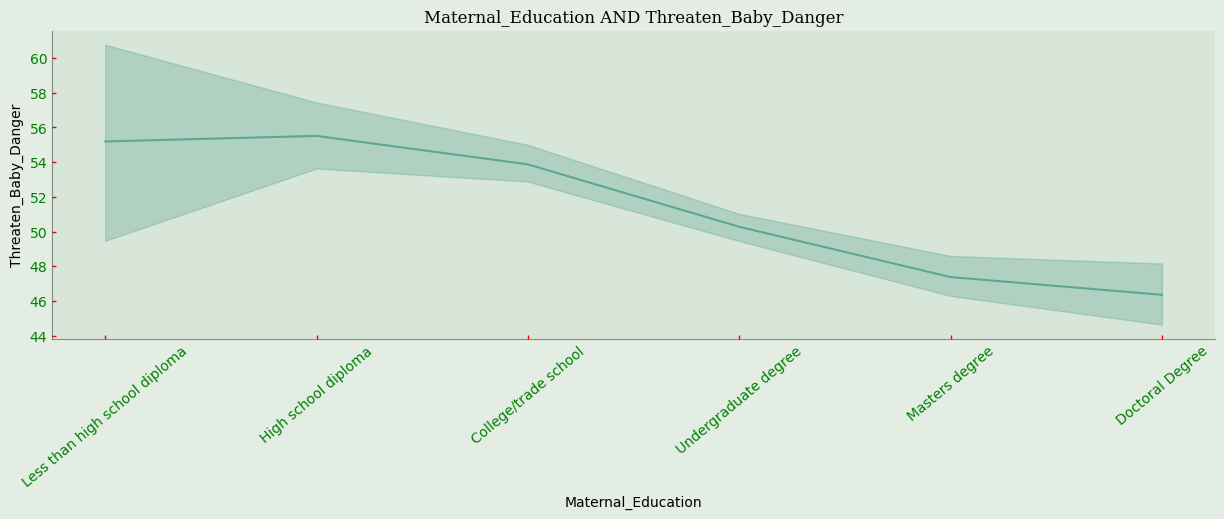

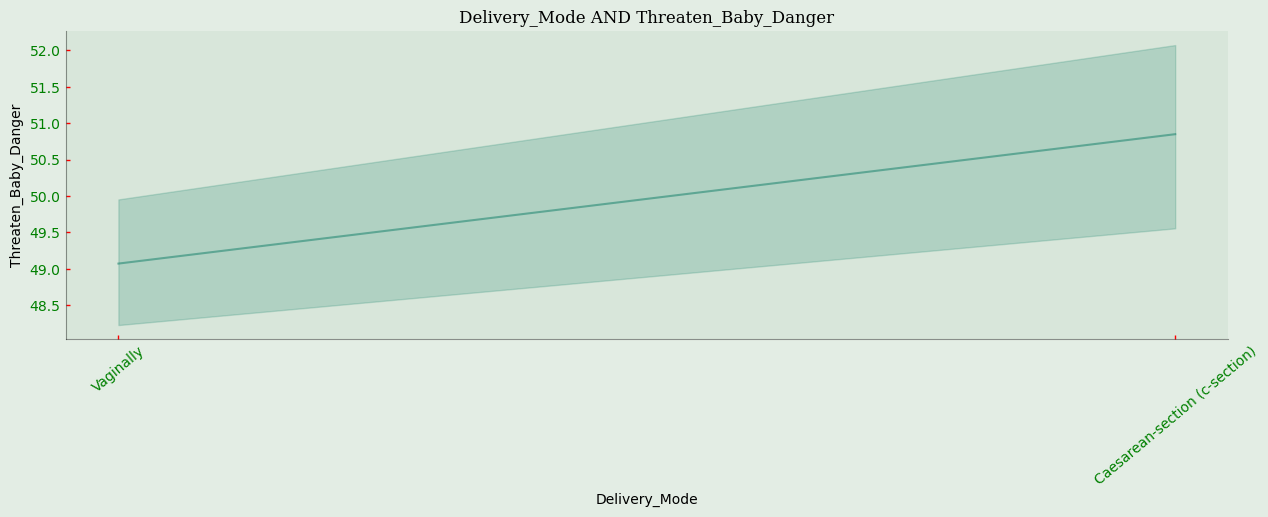

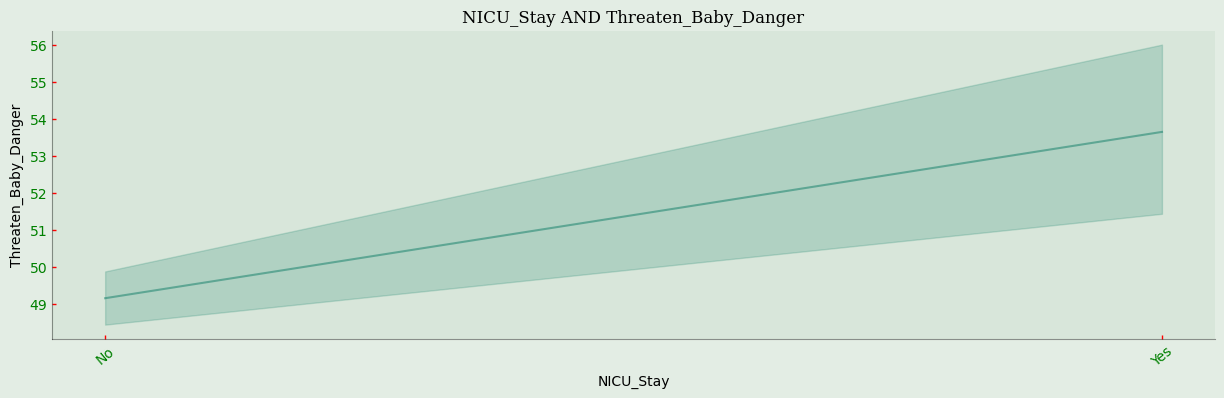

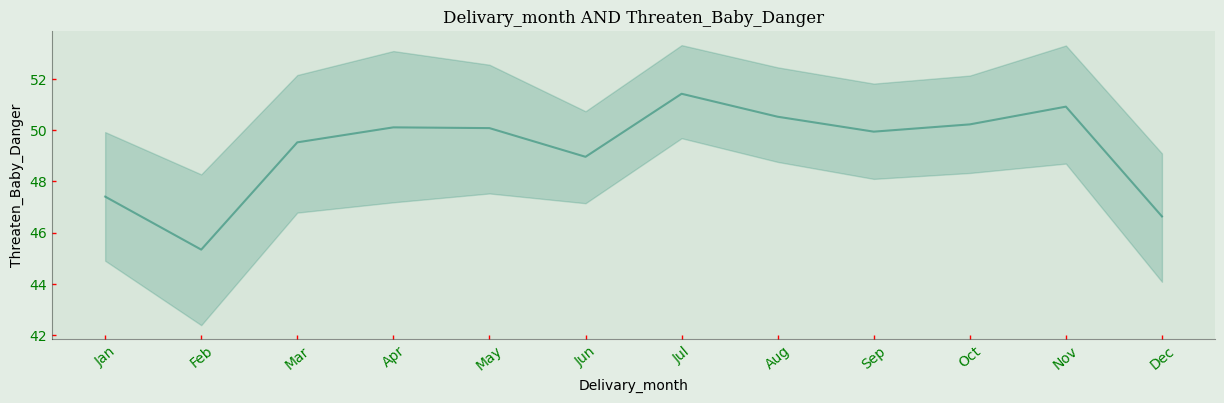

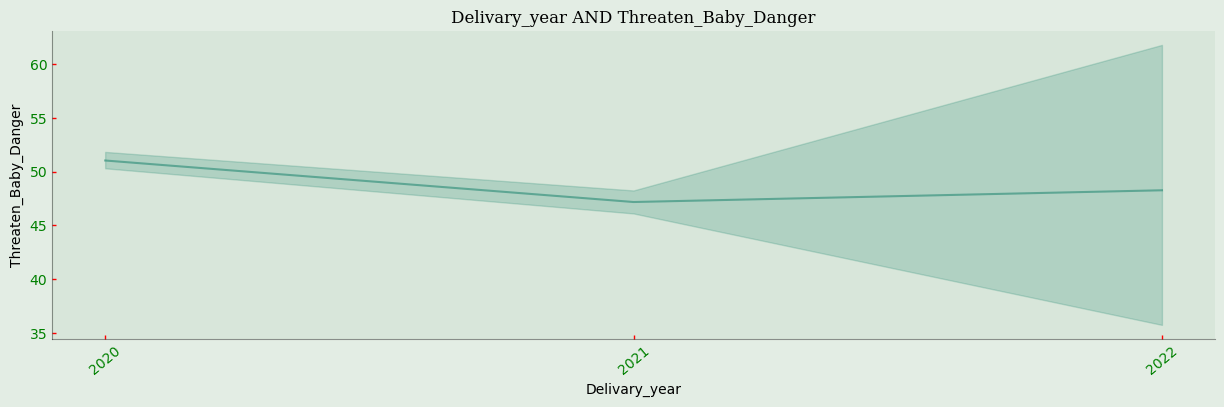

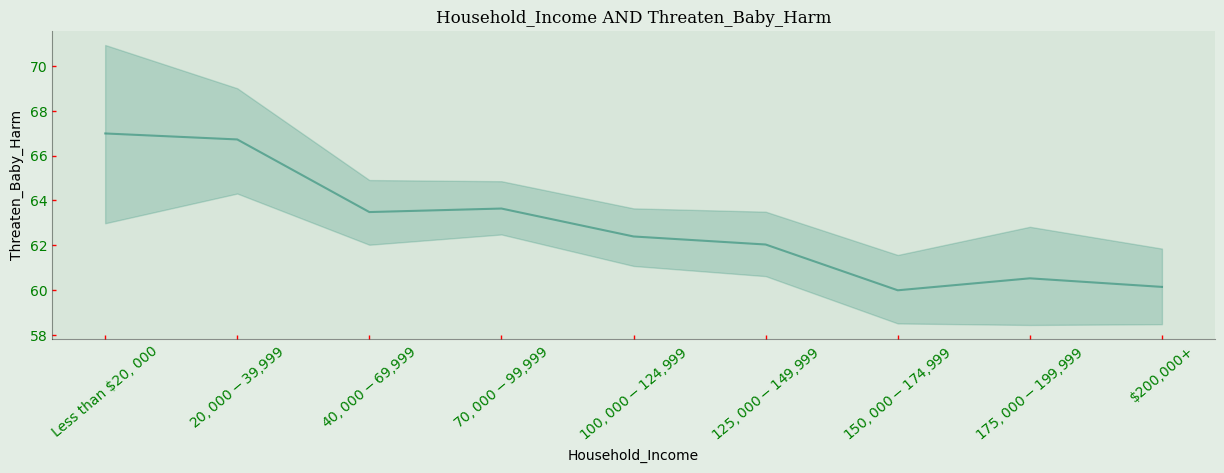

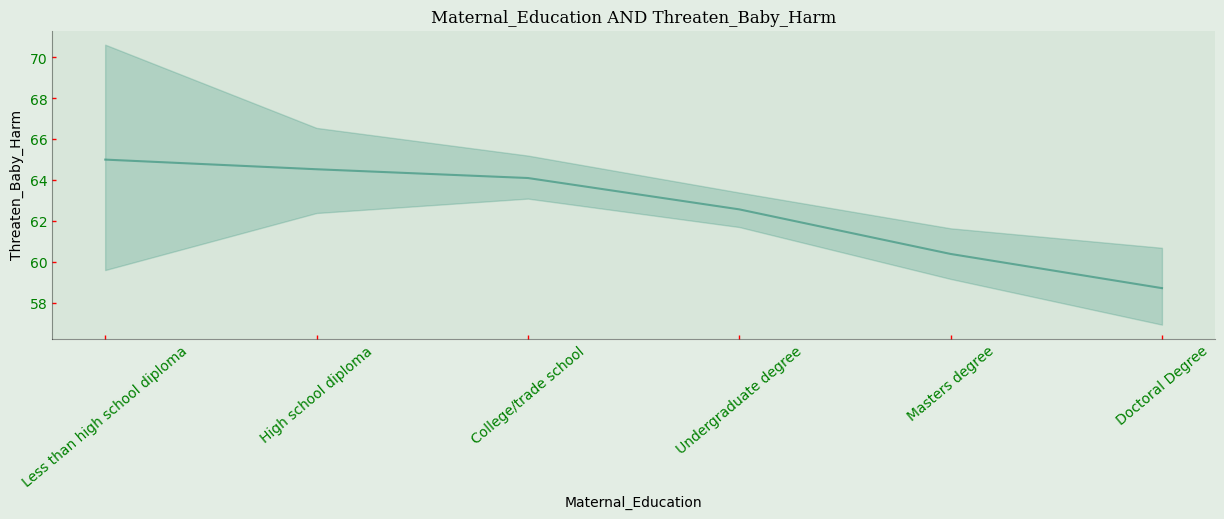

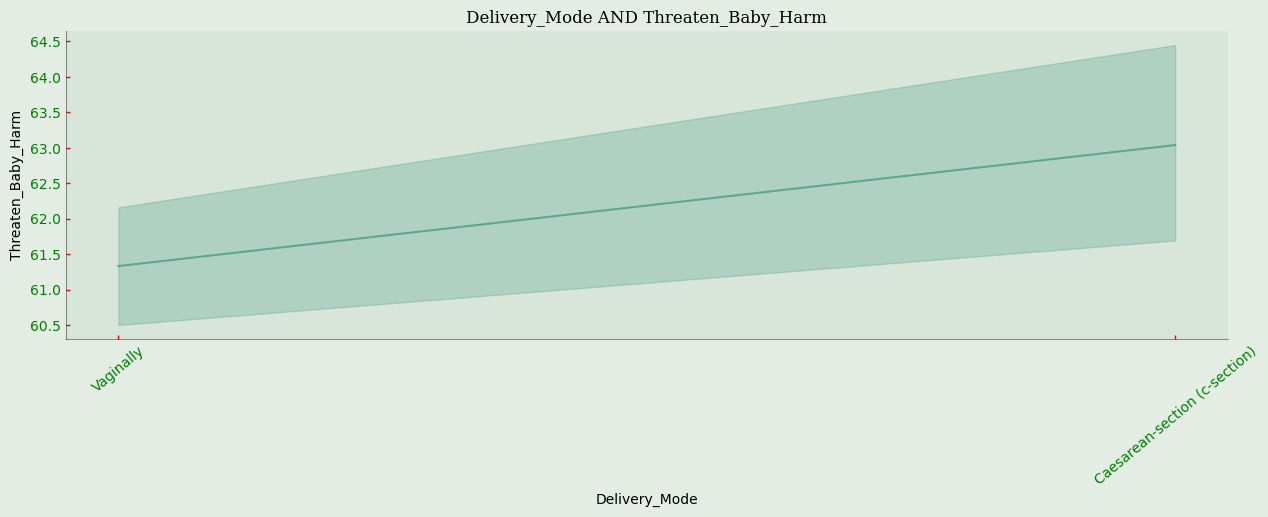

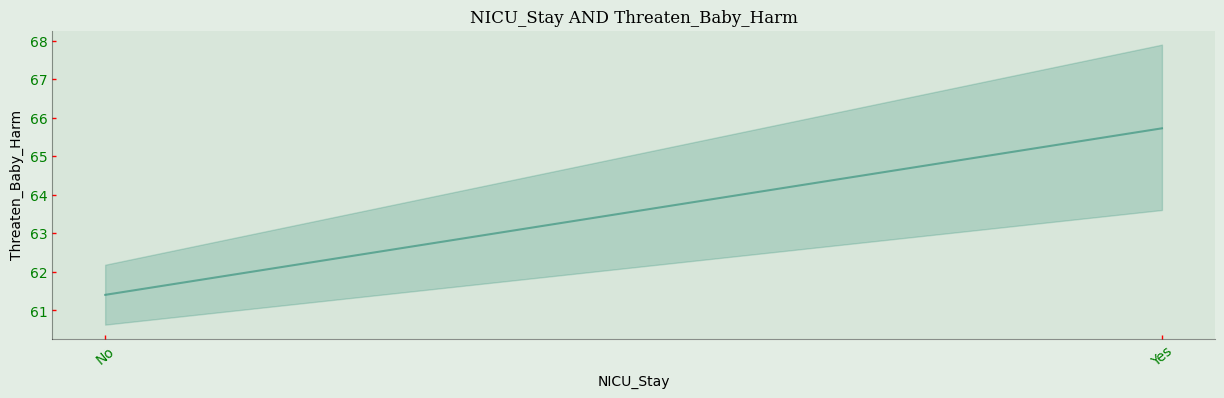

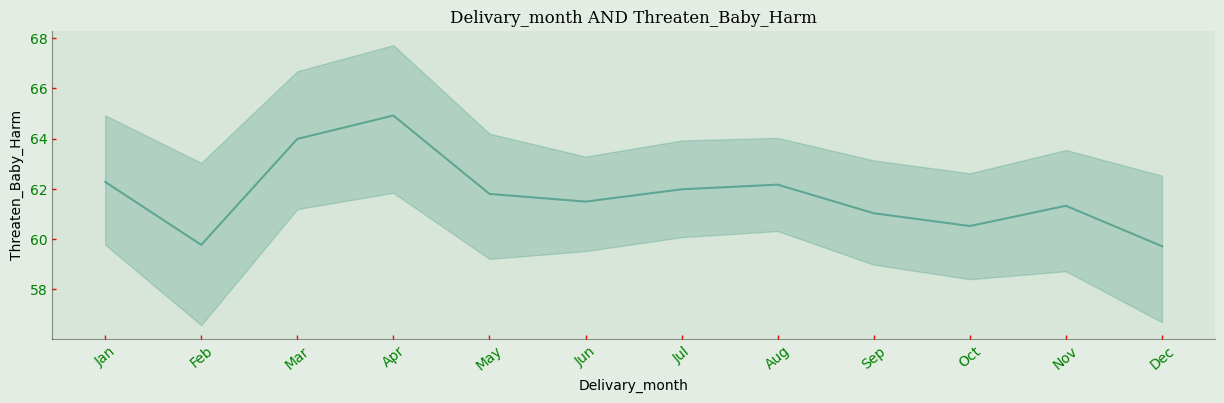

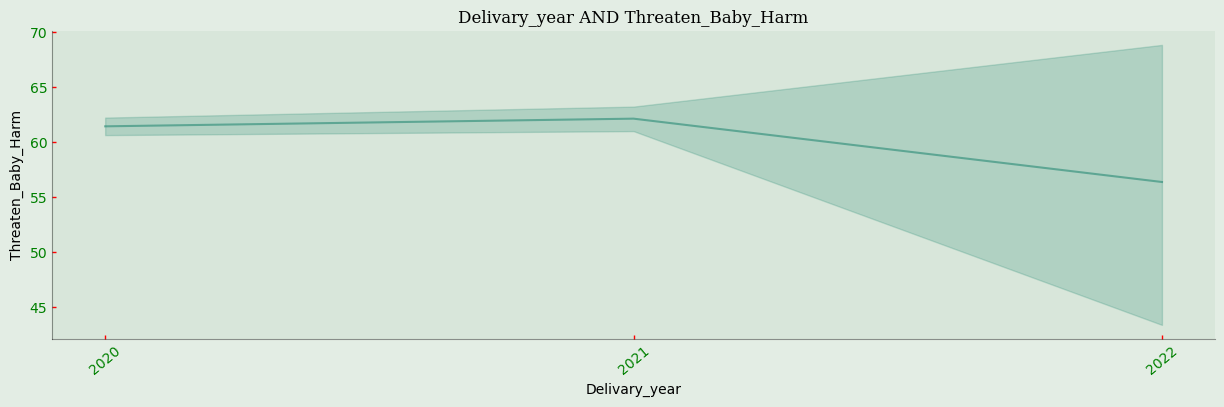

In [1008]:

for num_feature in numerical_columns:
    for cat_feature in cat_columns:
        cat_lineplot(x=cat_feature,y=num_feature)

In [1009]:
def cat_barplot(x,y):
    plt.figure(figsize=(15,4),facecolor='#C1D8C370')
    ax = sns.barplot(data=df,x=x,y=y,color='#0D7C6680')
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left','bottom']].set_alpha(0.4)
    plt.xticks(rotation=40)
    ax.set_facecolor('#C1D8C350')
    plt.title(f'{x} AND {y}',fontdict={'fontfamily':'serif'})
    ax.tick_params(direction='in', length=3, width=1,color='red',labelcolor='g')
    plt.show()

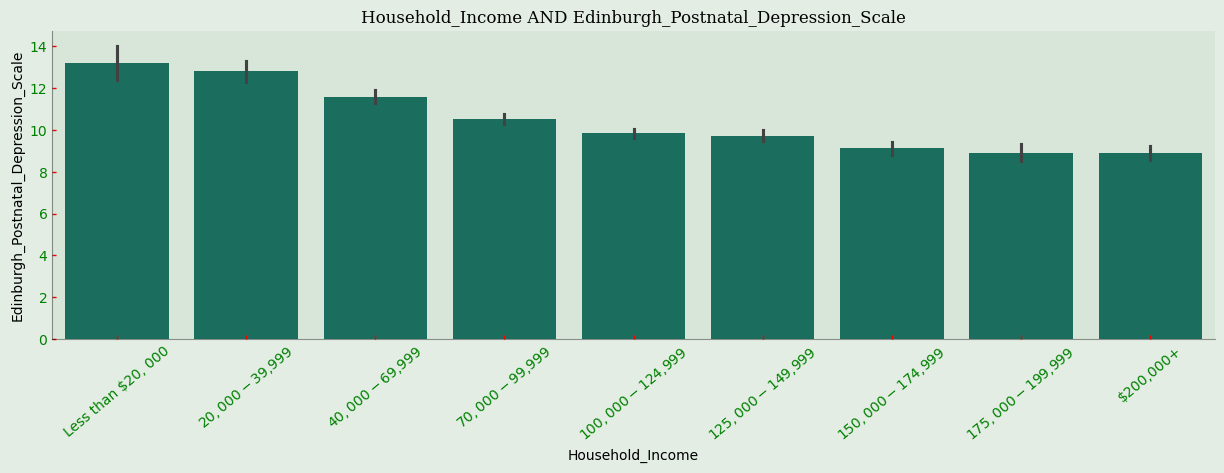

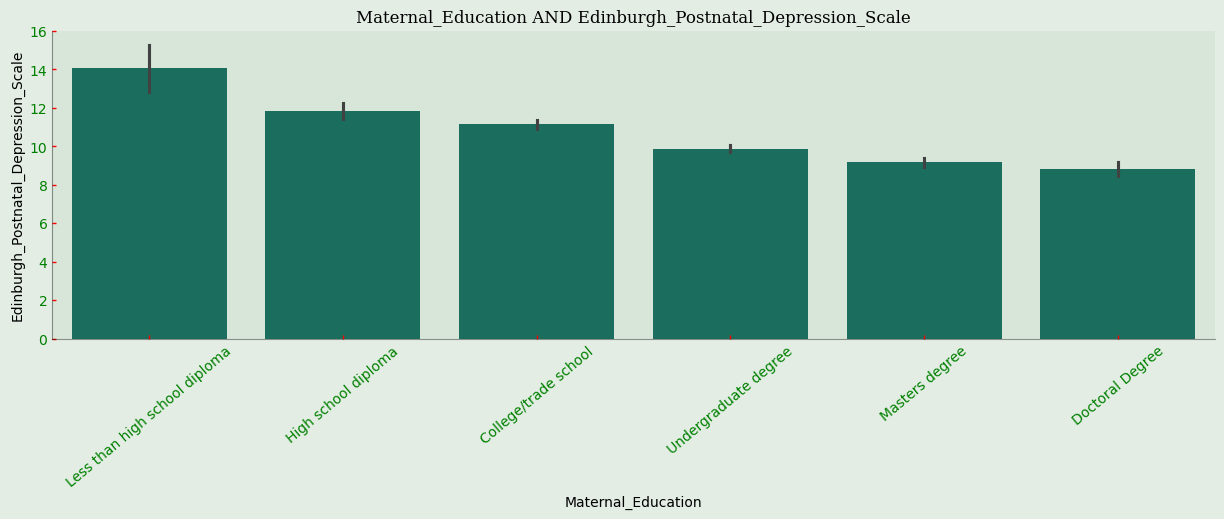

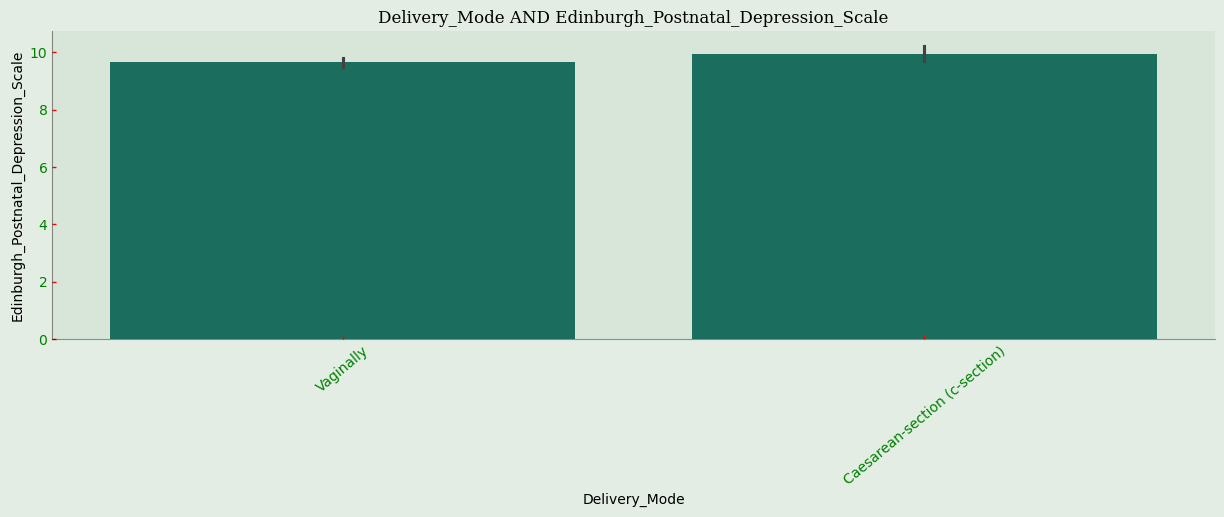

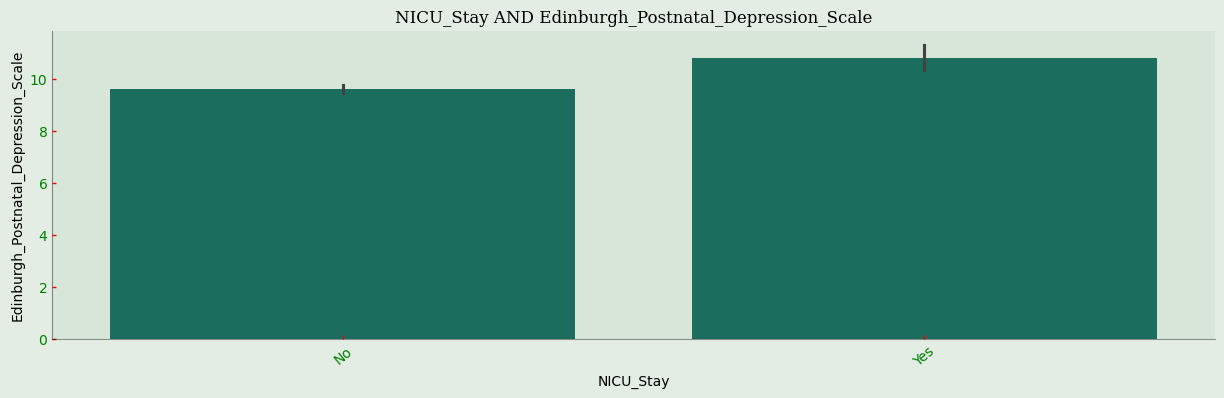

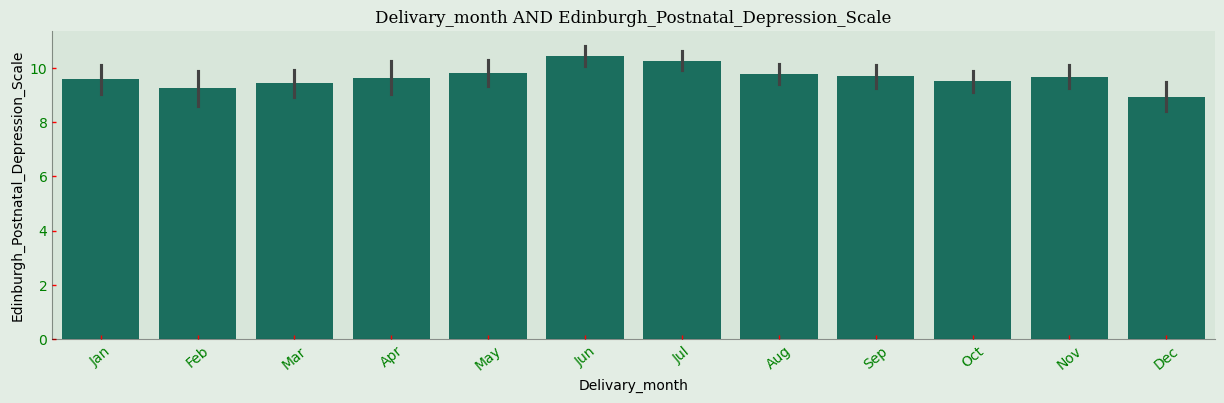

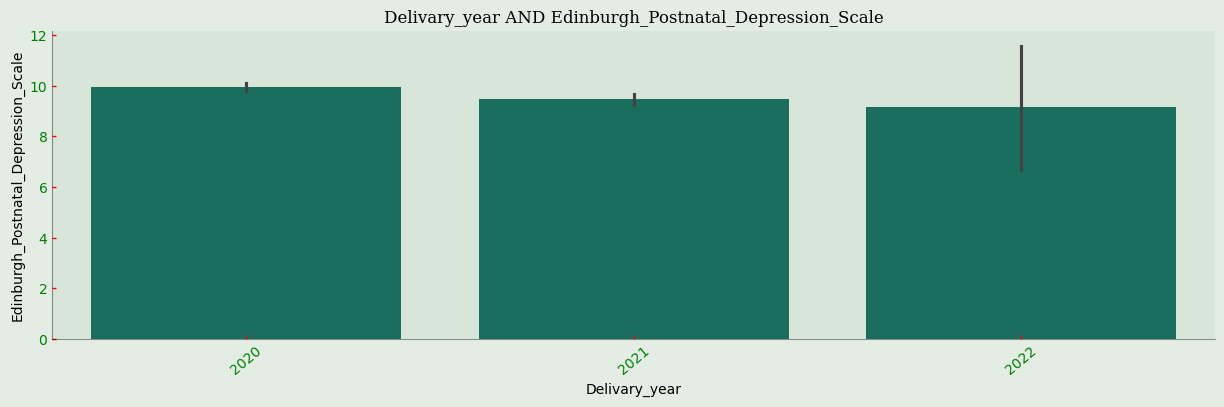

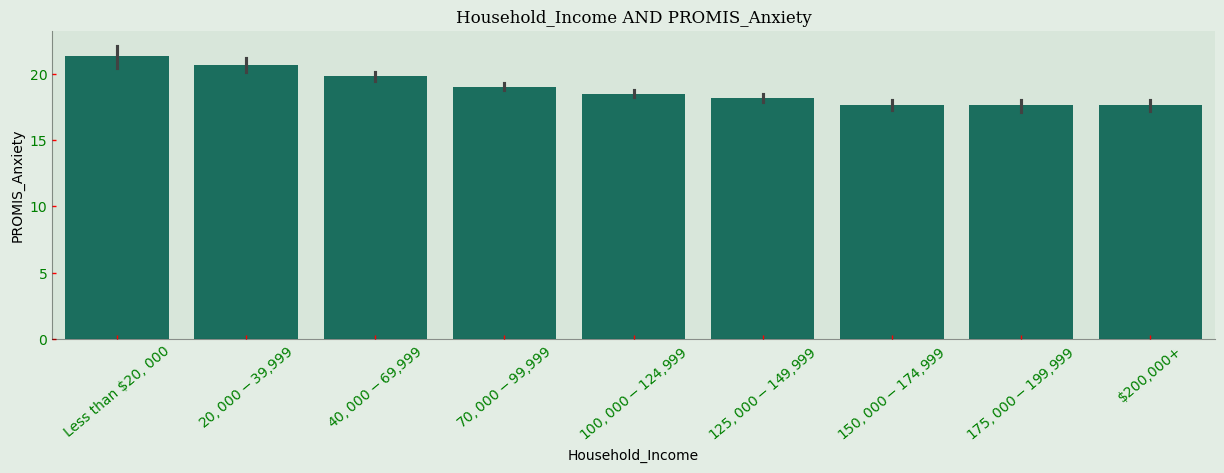

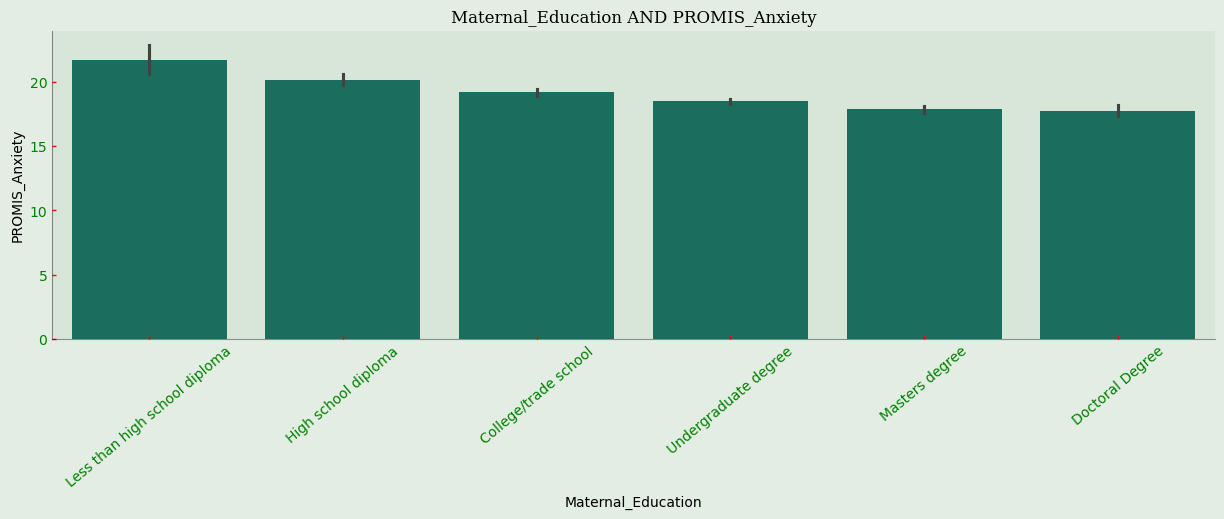

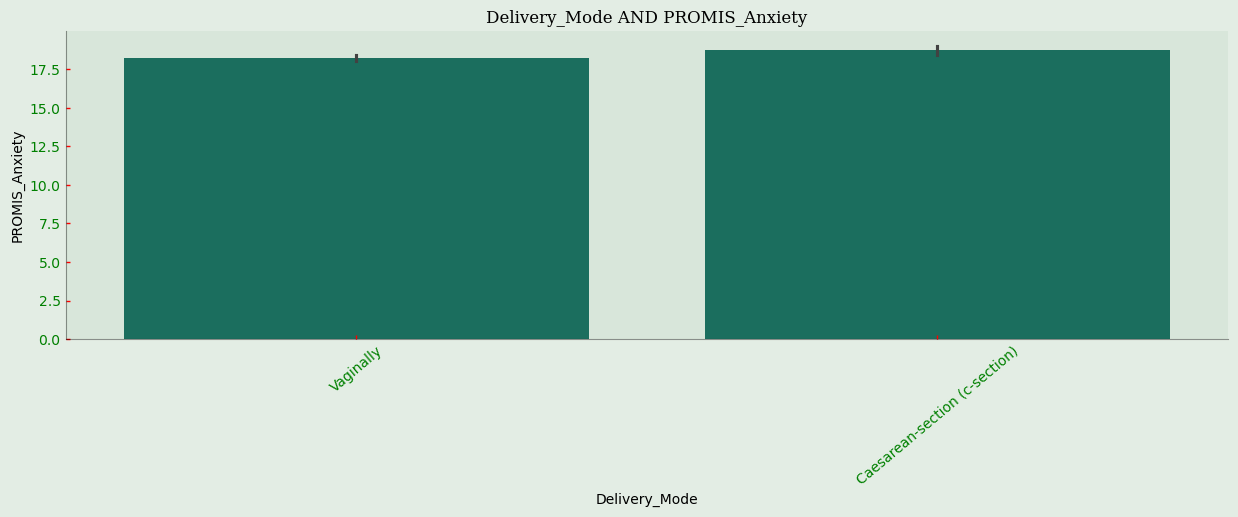

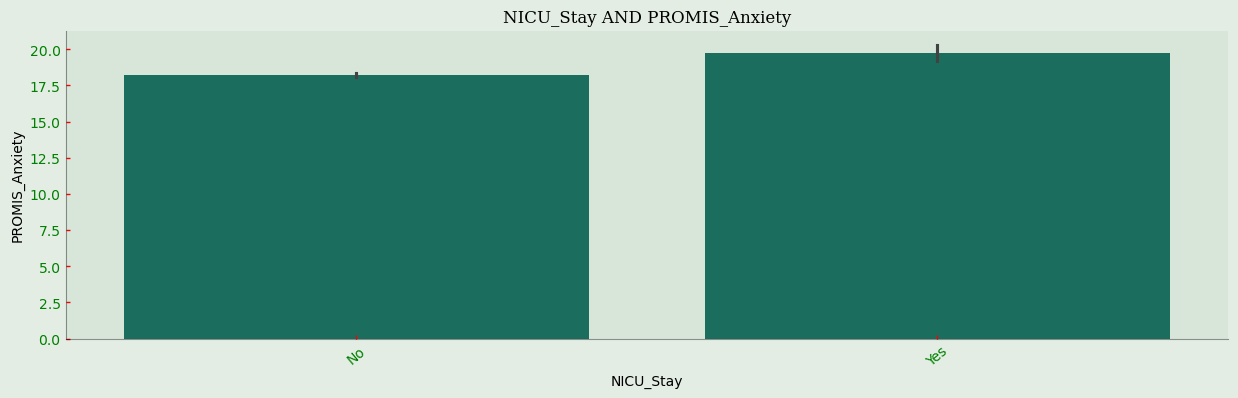

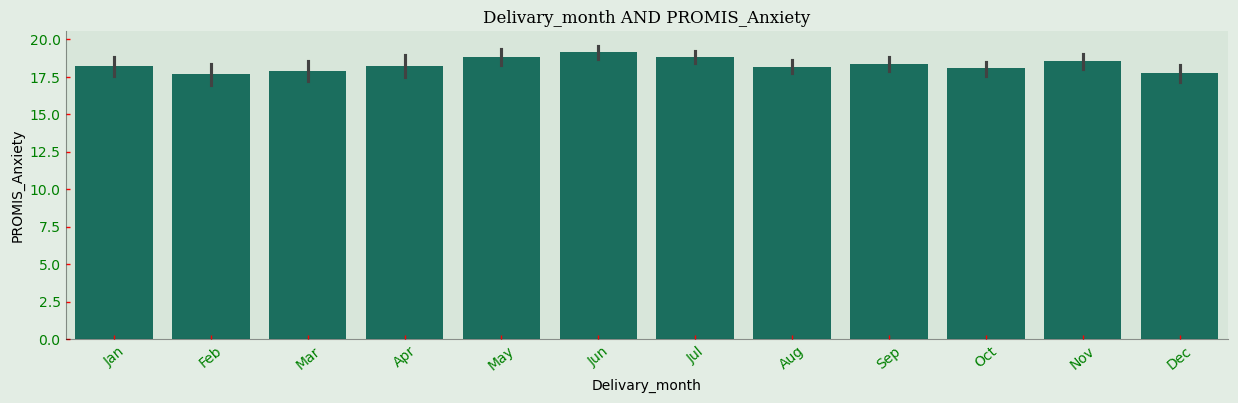

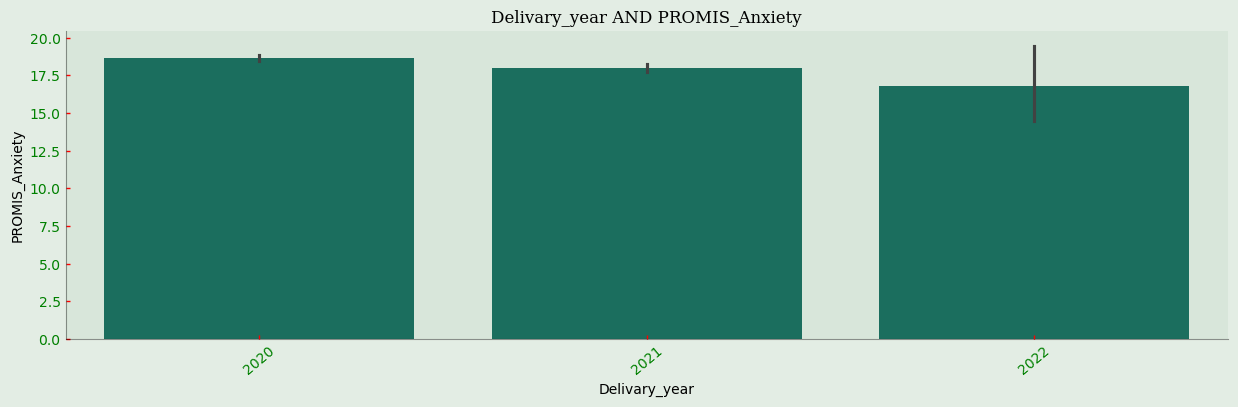

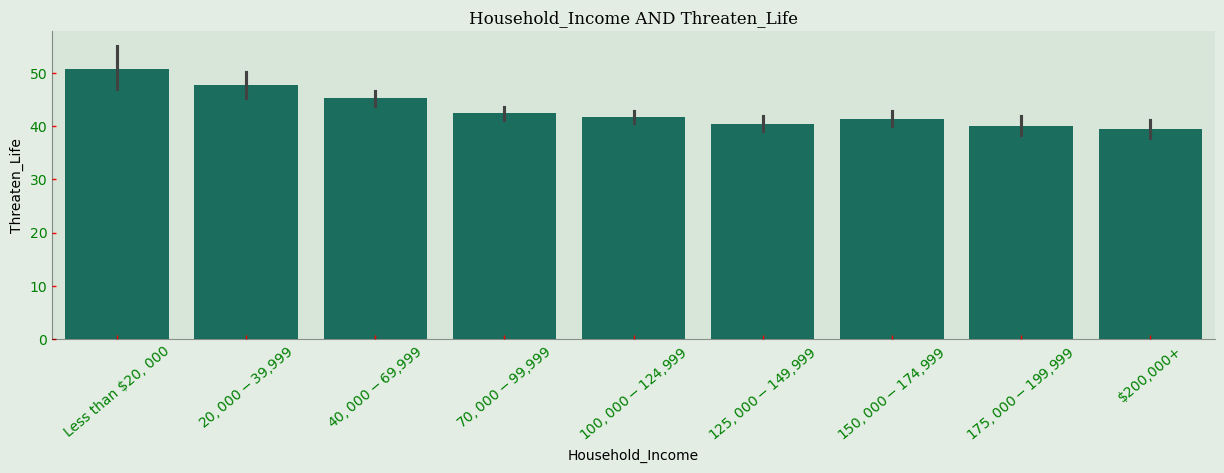

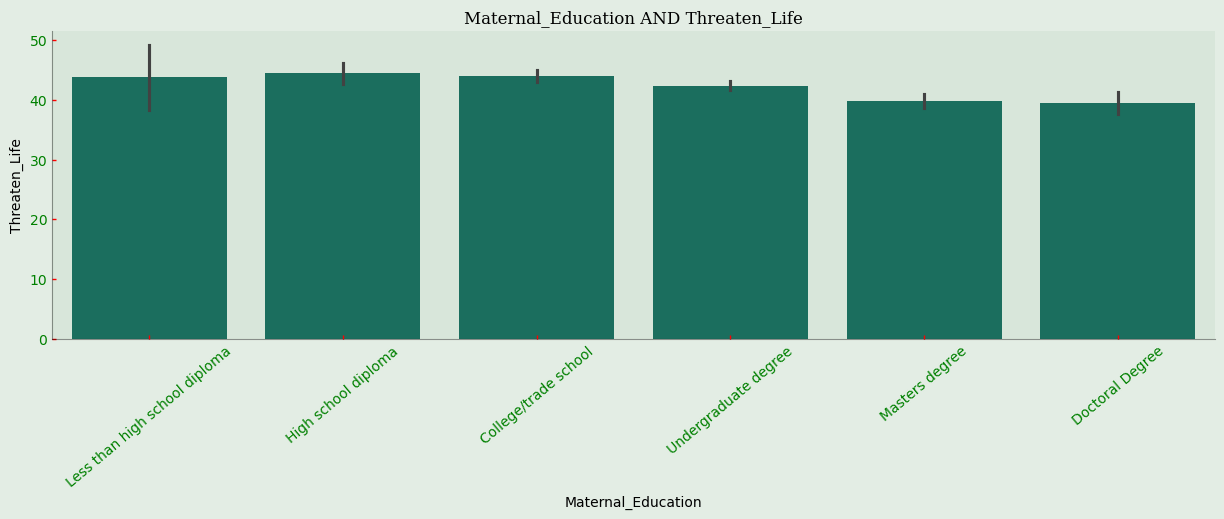

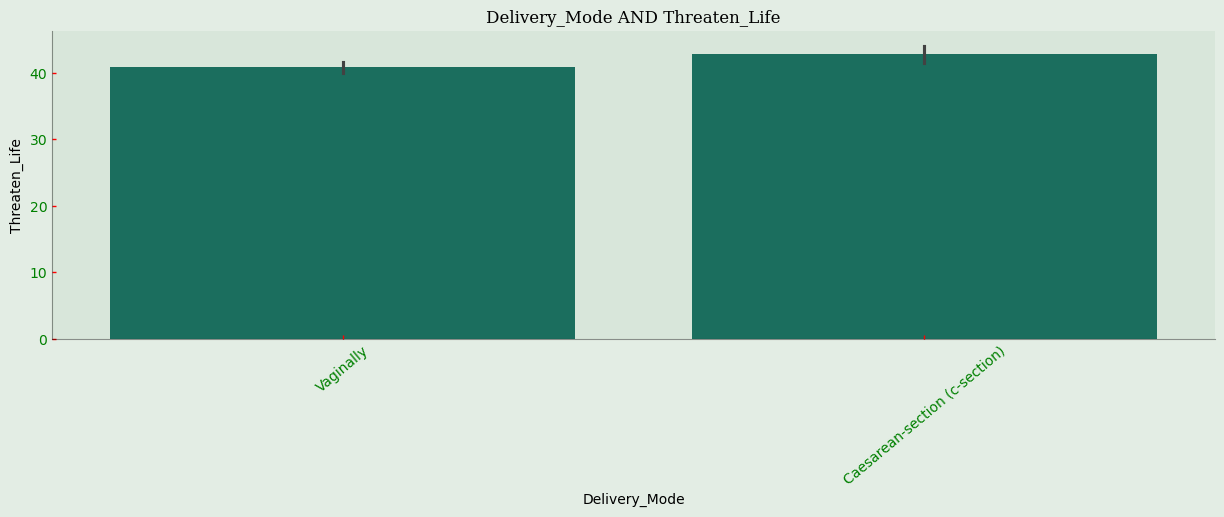

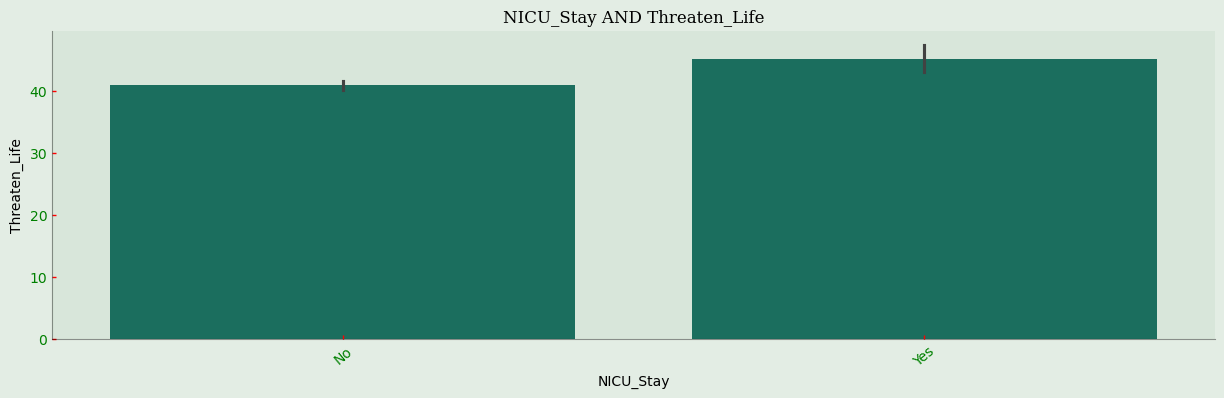

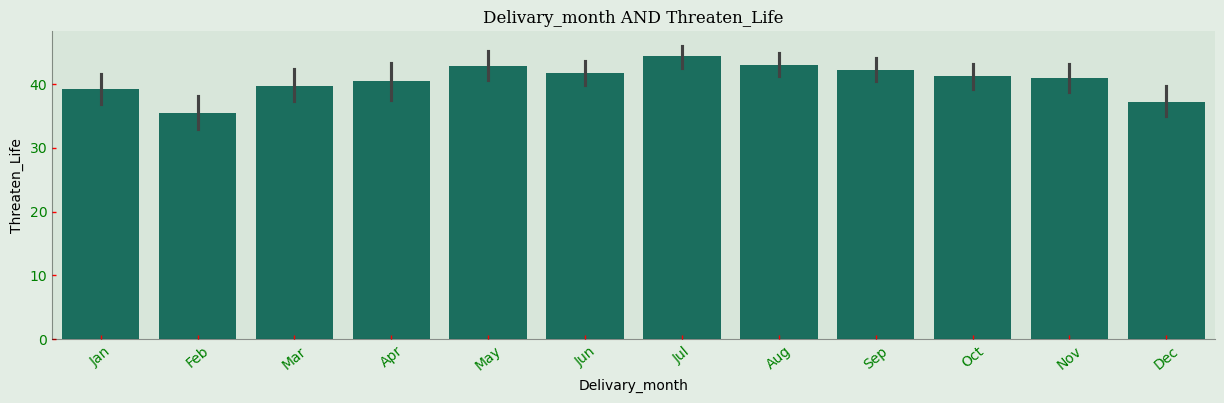

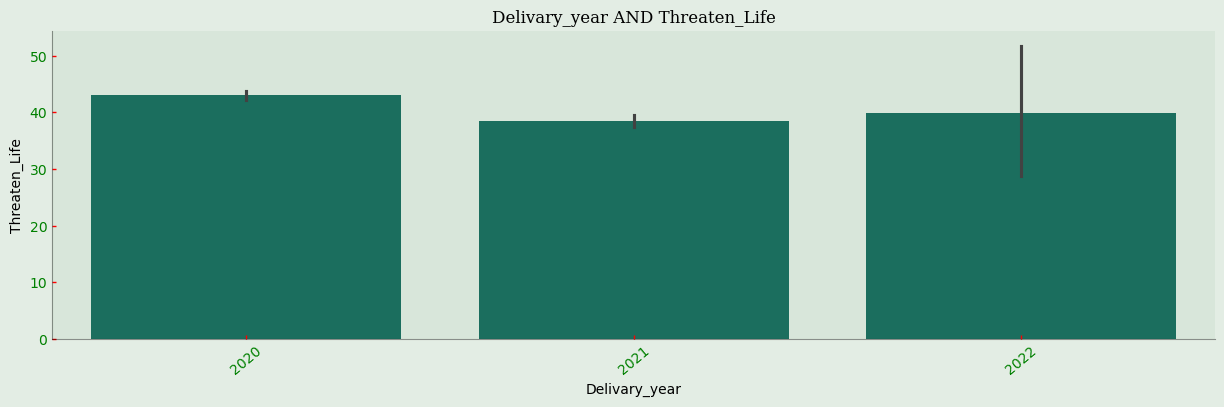

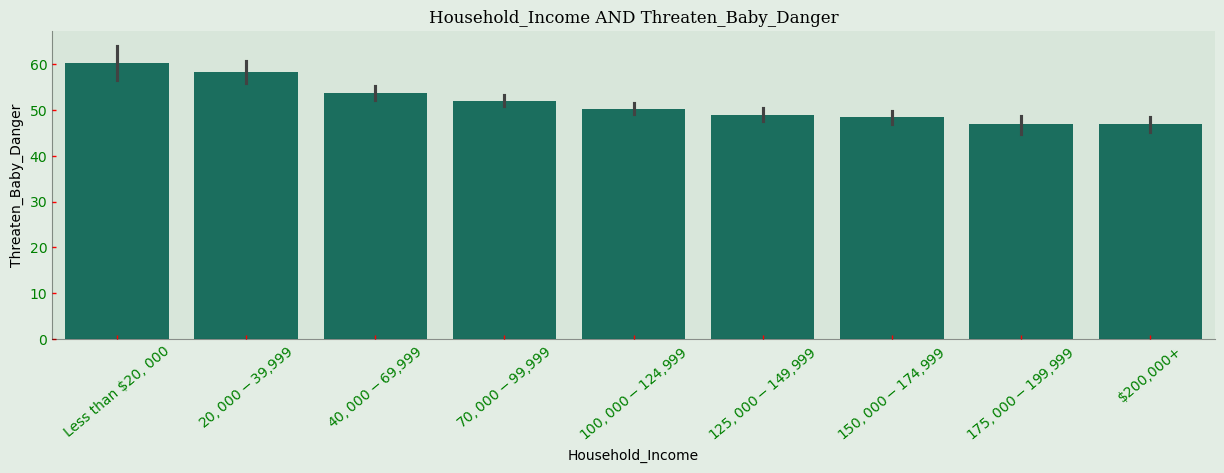

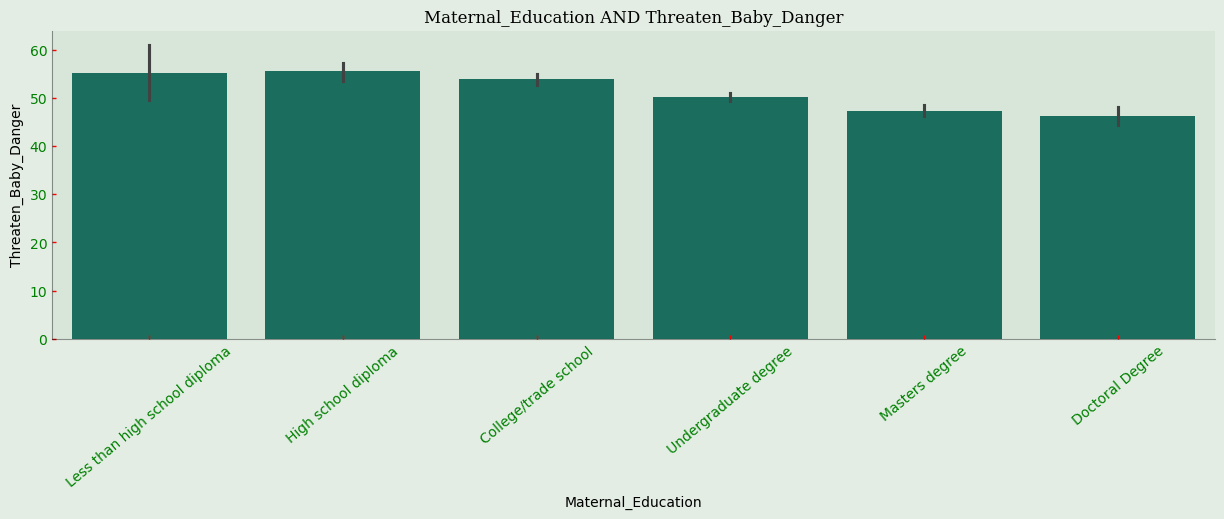

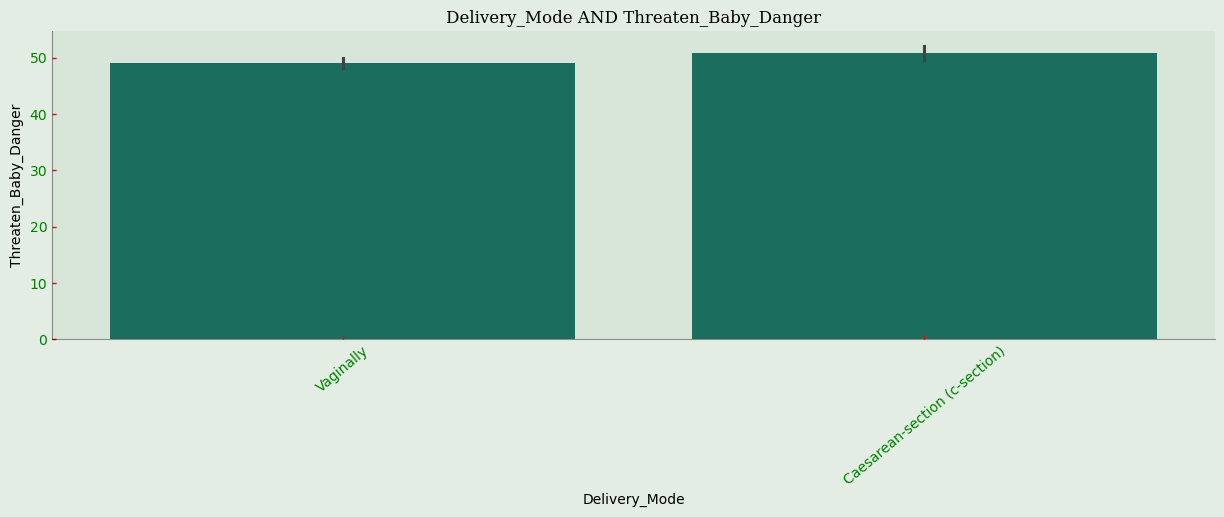

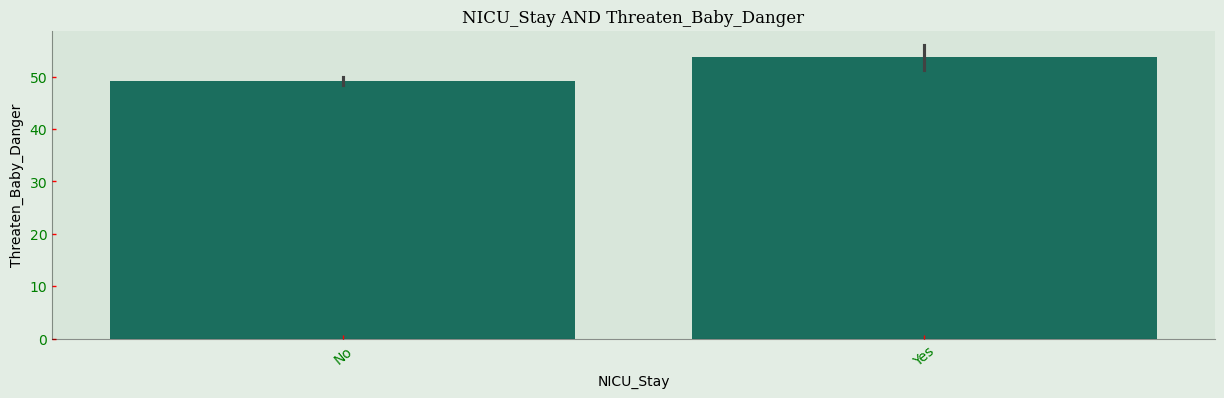

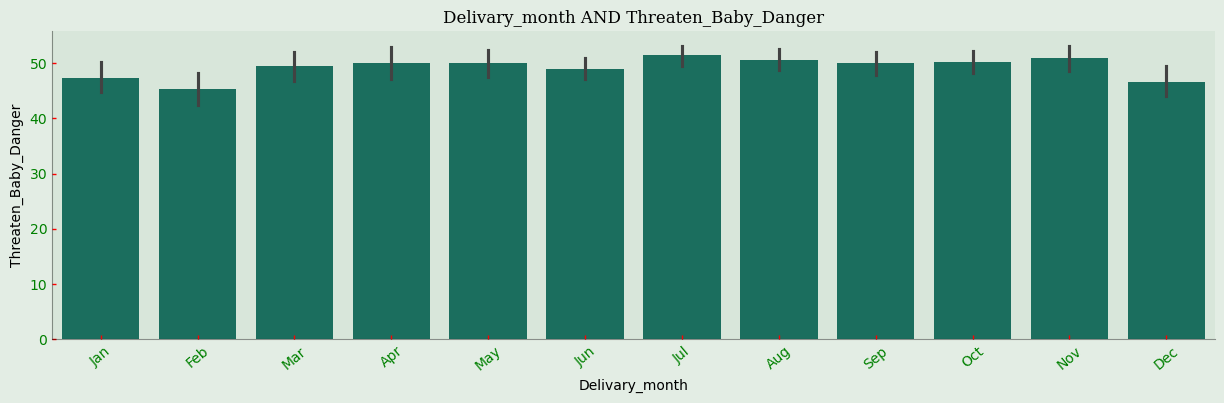

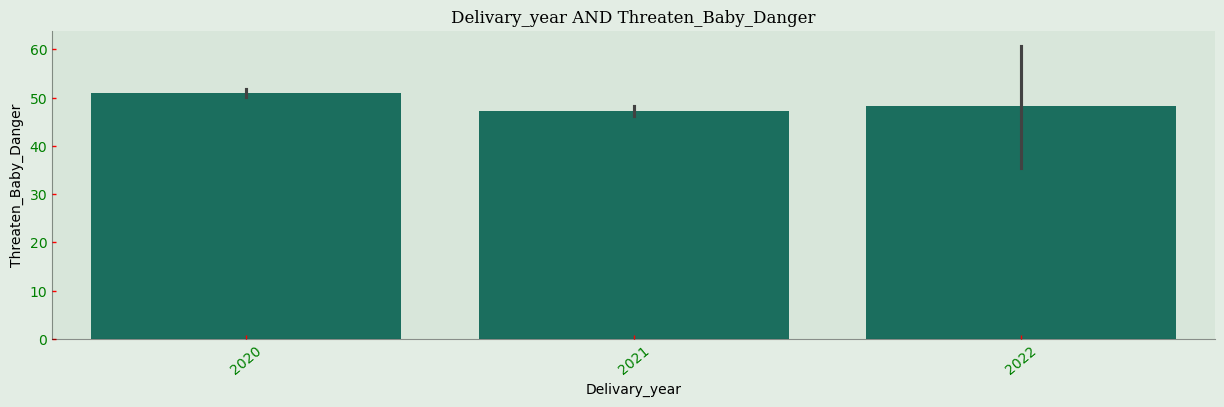

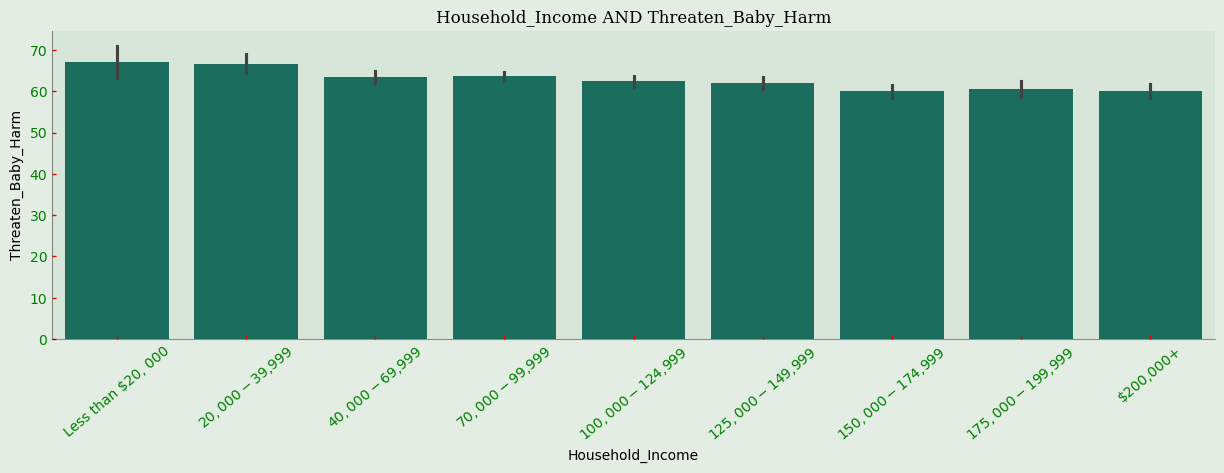

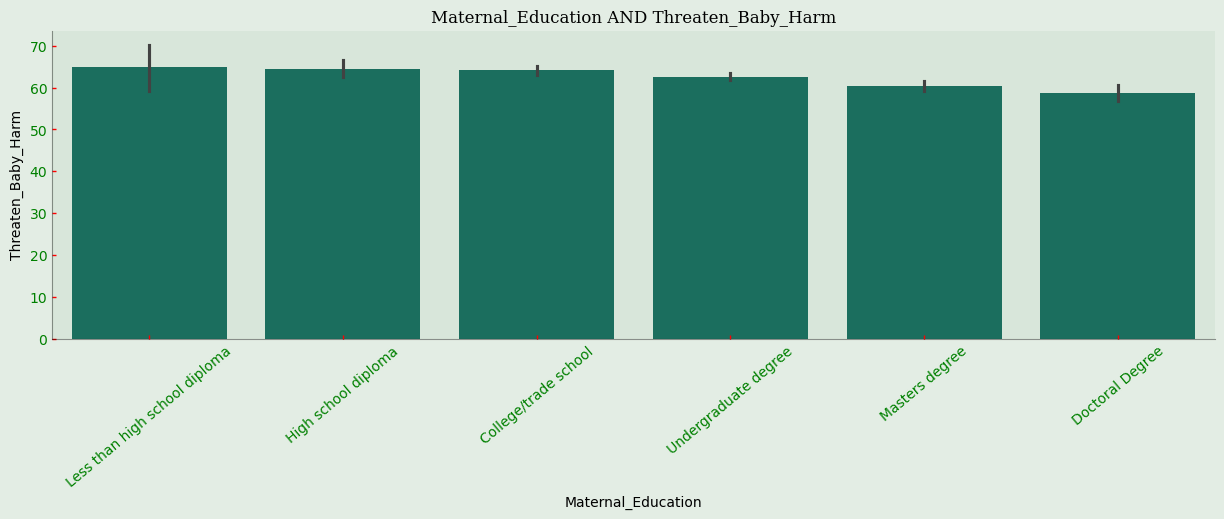

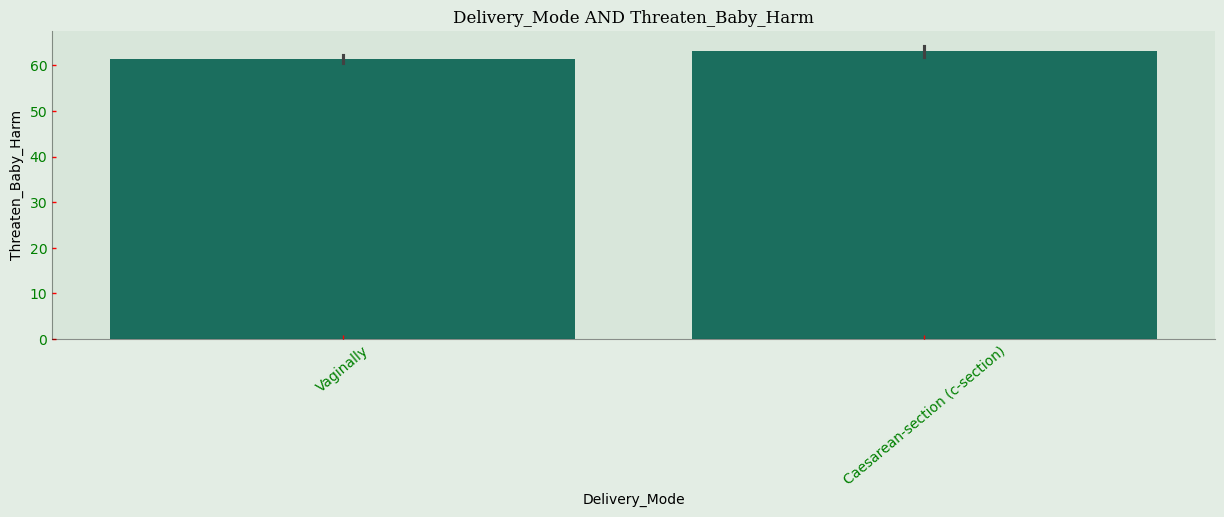

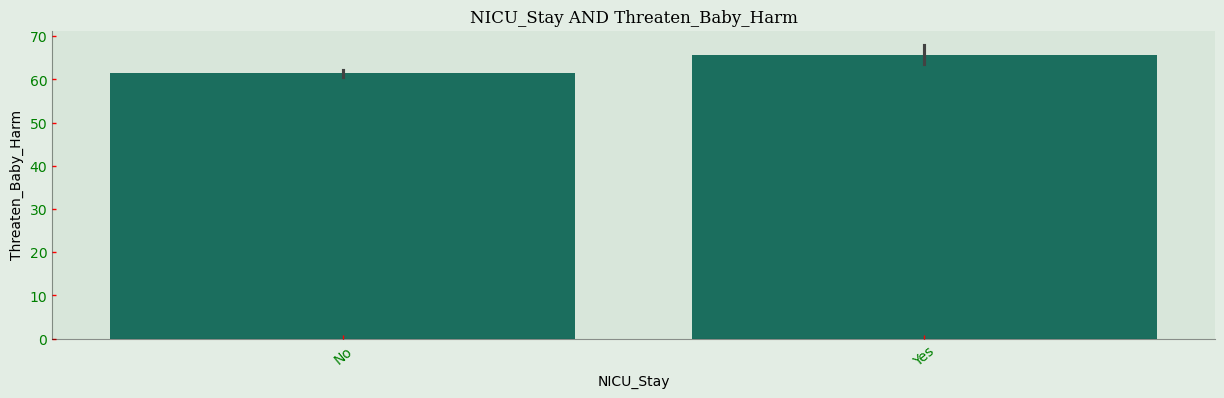

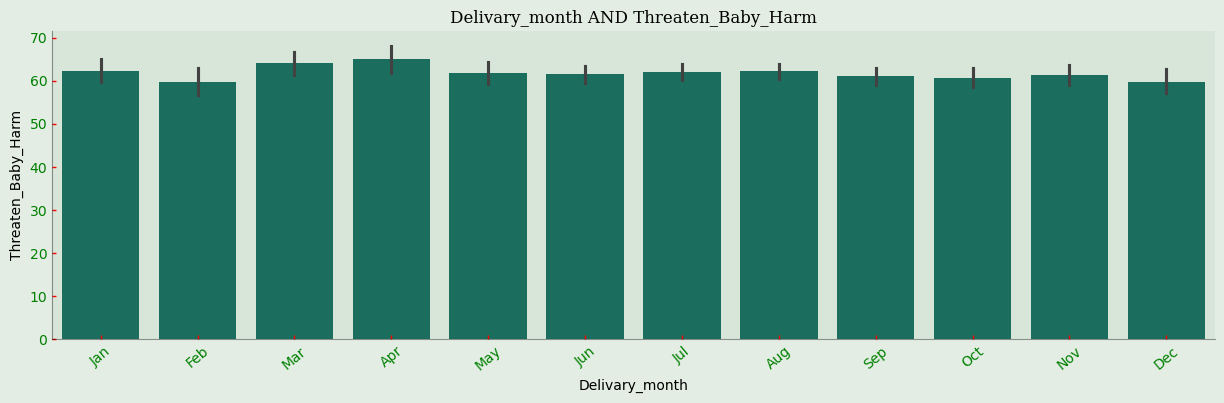

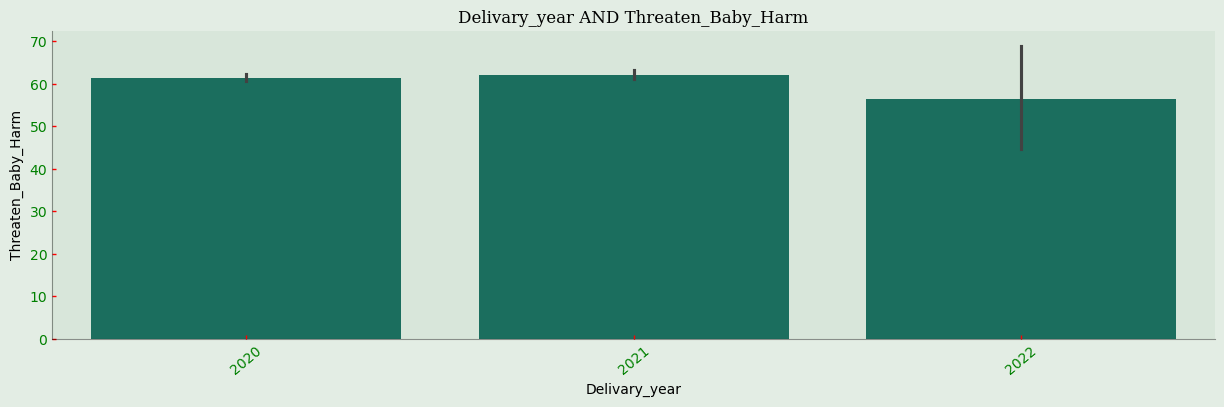

In [1010]:
for num_feature in numerical_columns:
    for cat_feature in cat_columns:
        cat_barplot(x=cat_feature,y=num_feature)

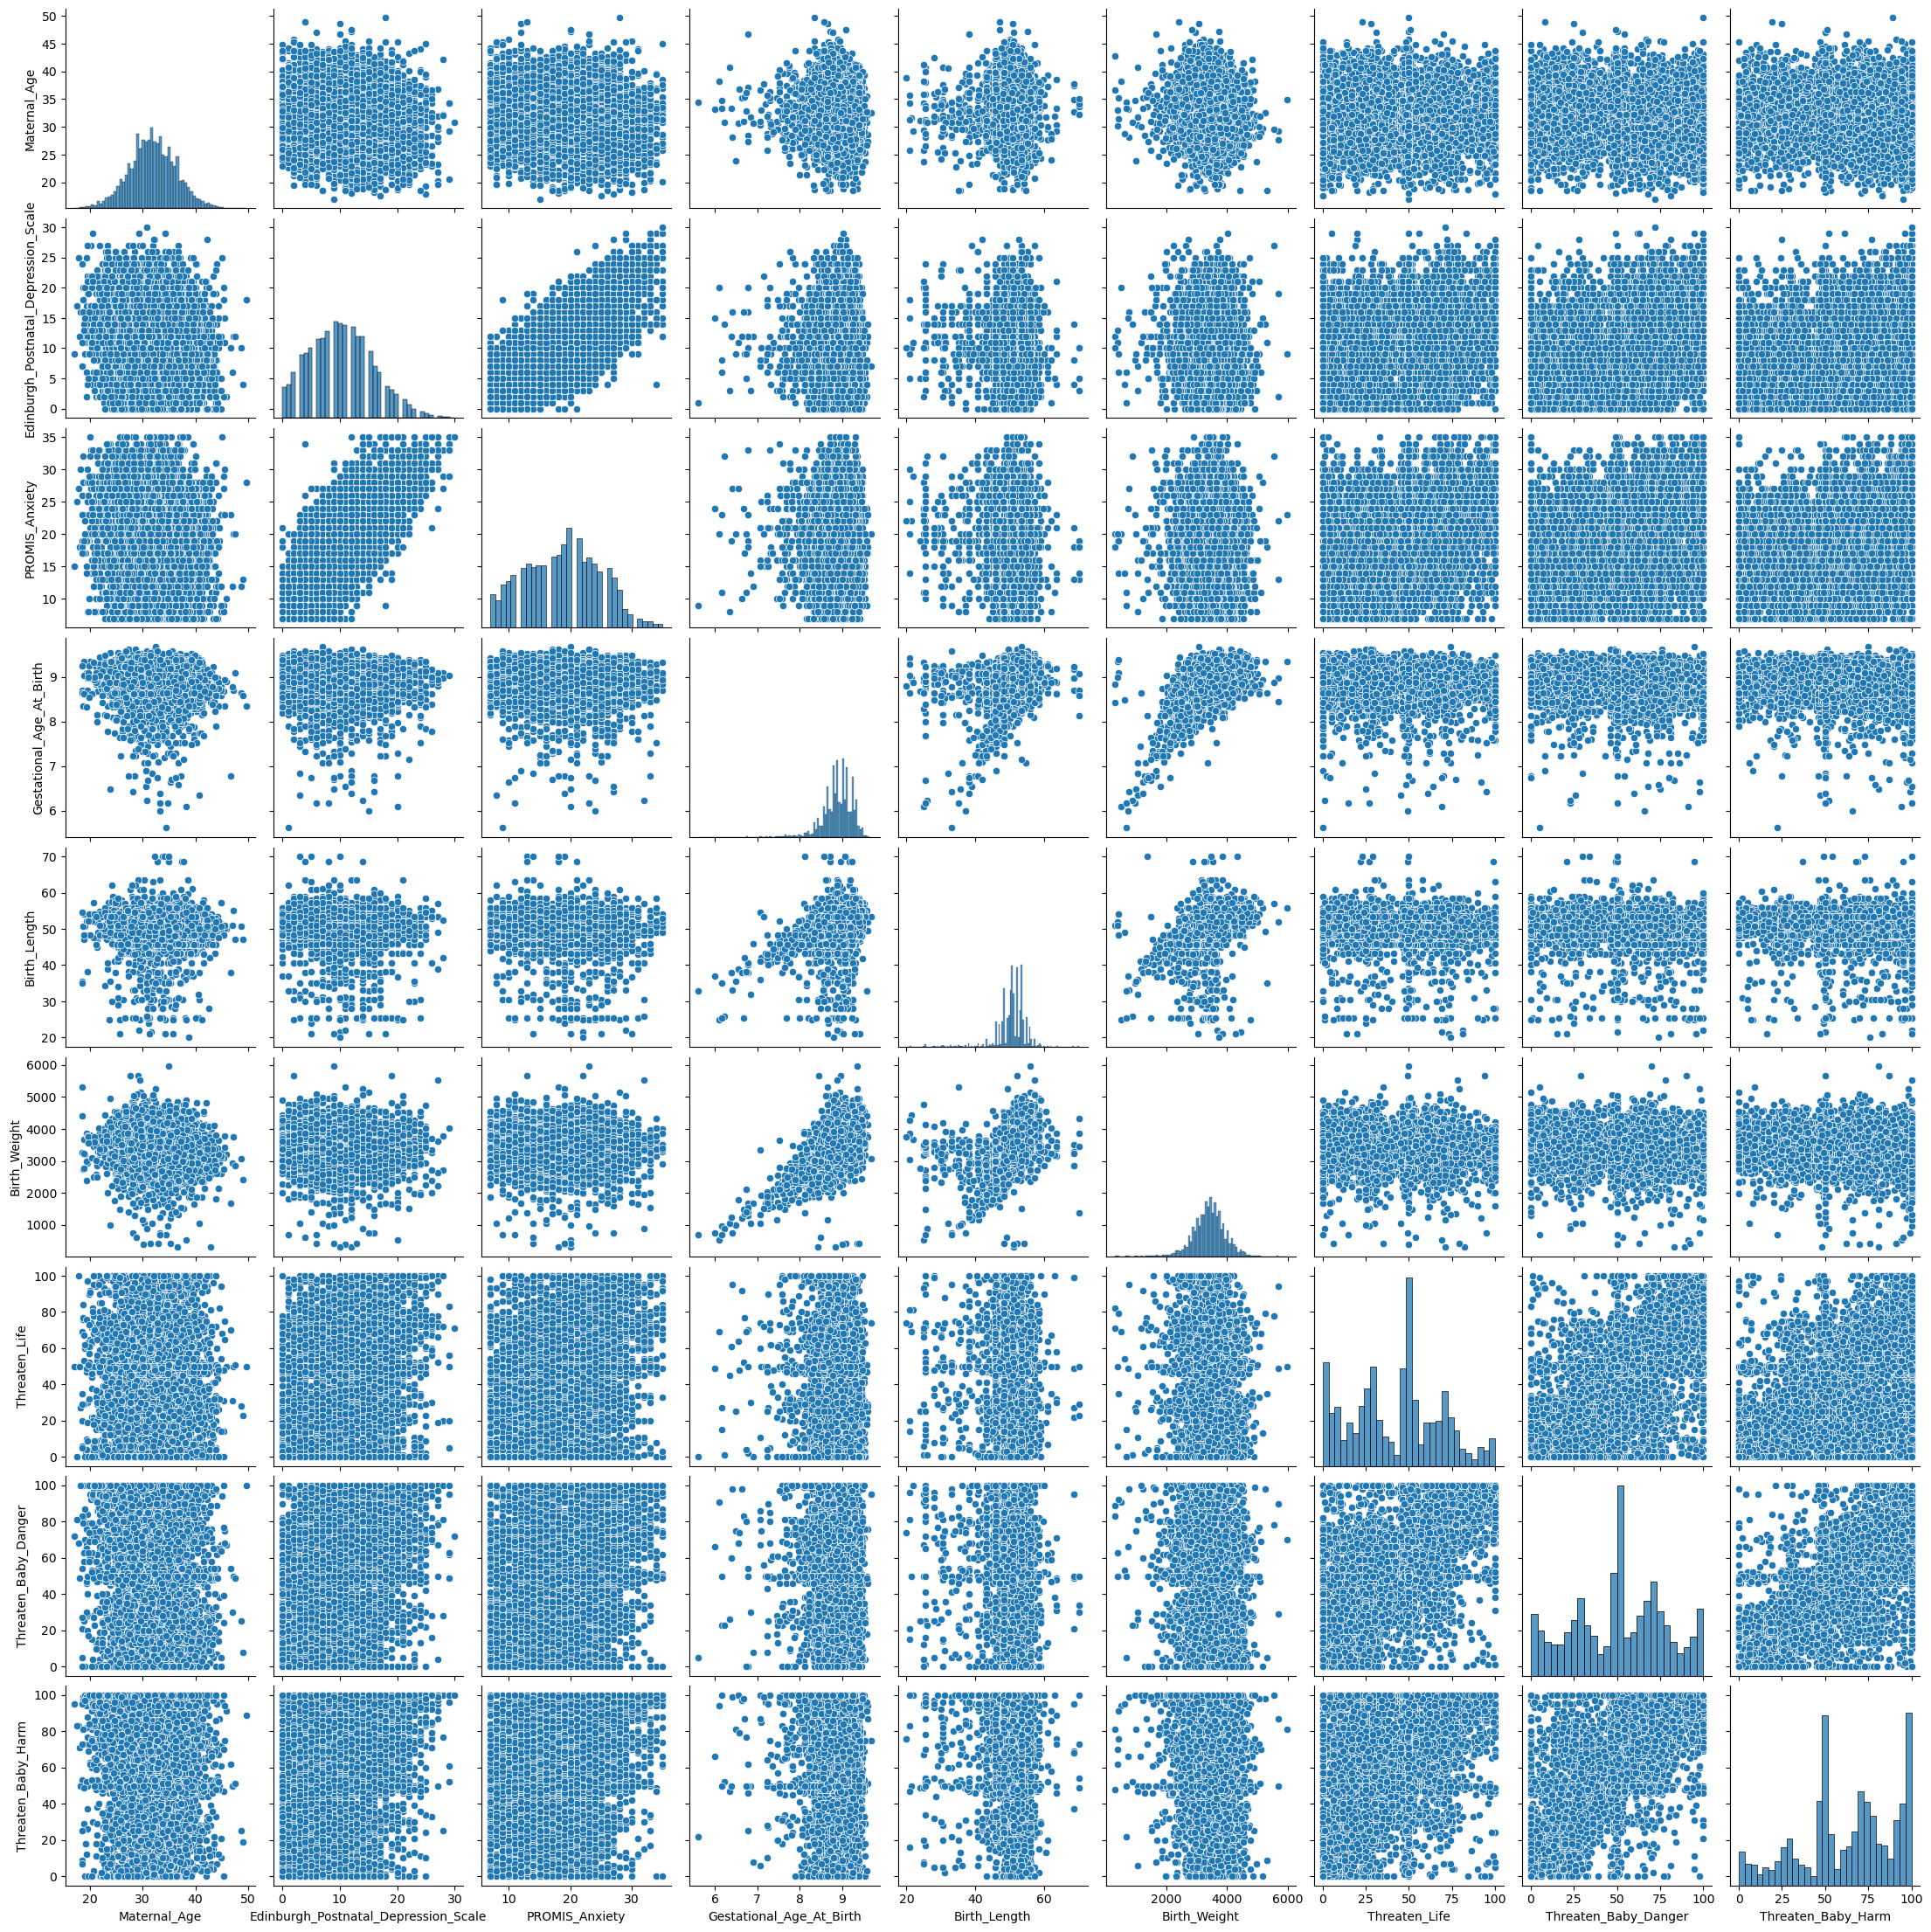

In [1011]:
sns.pairplot(df)

<Axes: >

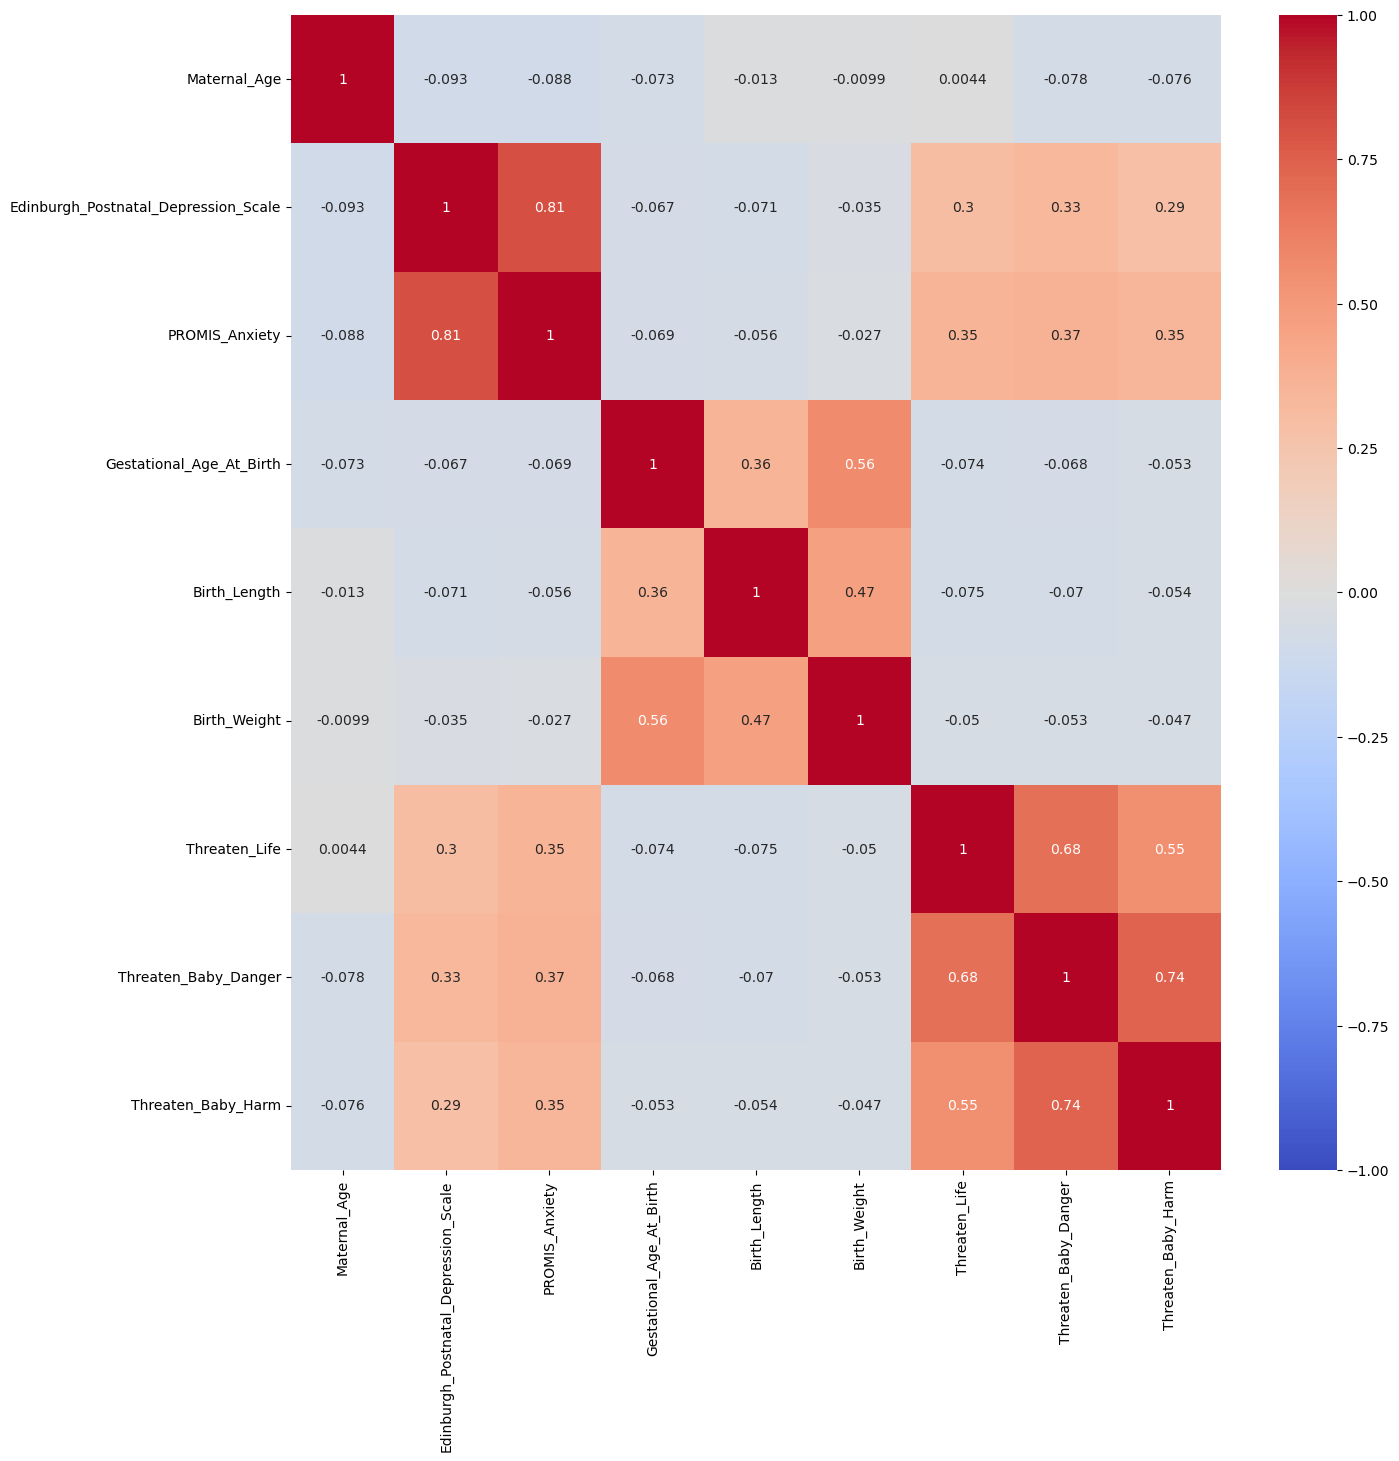

In [1012]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',vmin=-1)

In [1013]:
df['Gestational_Age_At_Birth'] = df['Gestational_Age_At_Birth'].round()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1864\2478427062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gestational_Age_At_Birth'] = df['Gestational_Age_At_Birth'].round()


In [1014]:
df['Maternal_age_cat'] = df['Maternal_Age'].apply(lambda x:'Underage' if x<22 else ('Healthyage' if x>=22 and x<=38 else "Overage"))

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1864\350579120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Maternal_age_cat'] = df['Maternal_Age'].apply(lambda x:'Underage' if x<22 else ('Healthyage' if x>=22 and x<=38 else "Overage"))


In [1016]:
# Check Age catogry With Delivery Mode
age_cat_delivery_mode = pd.crosstab(df['Maternal_age_cat'],df['Delivery_Mode'],normalize='index')*100
age_cat_delivery_mode

Delivery_Mode     Caesarean-section (c-section)  Vaginally
Maternal_age_cat                                          
Healthyage                            27.963080  72.036920
Overage                               43.253968  56.746032
Underage                              20.000000  80.000000

In [1018]:
age_cat_delivery_mode = age_cat_delivery_mode.stack().reset_index().rename(columns={0:'Percentage'})
age_cat_delivery_mode

Maternal_age_cat                  Delivery_Mode  Percentage
0       Healthyage  Caesarean-section (c-section)   27.963080
1       Healthyage                      Vaginally   72.036920
2          Overage  Caesarean-section (c-section)   43.253968
3          Overage                      Vaginally   56.746032
4         Underage  Caesarean-section (c-section)   20.000000
5         Underage                      Vaginally   80.000000

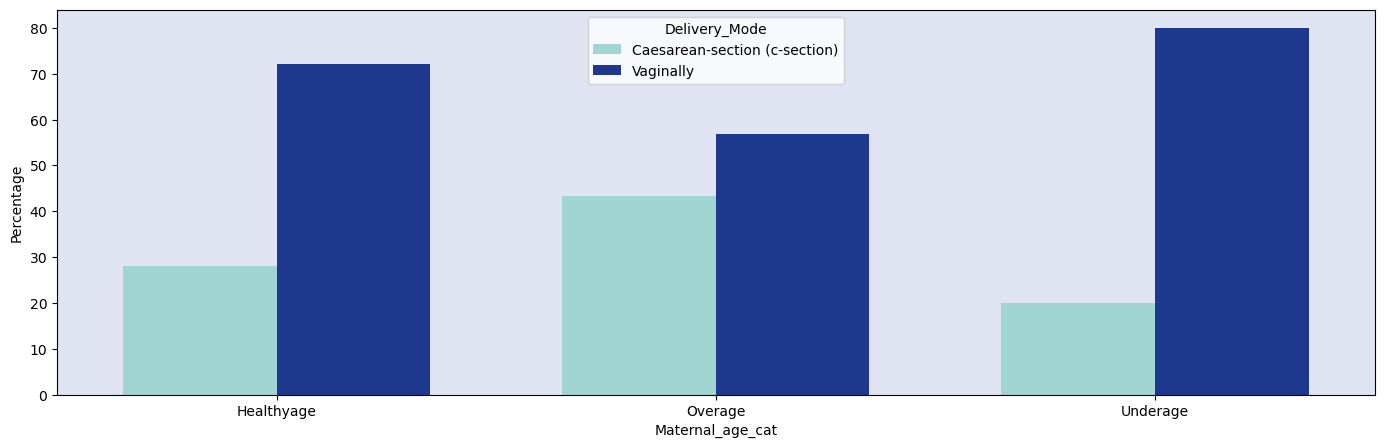

In [1020]:
plt.figure(figsize=(17,5))
ax = sns.barplot(data=age_cat_delivery_mode,x='Maternal_age_cat',y='Percentage',hue='Delivery_Mode',width=.7,palette=['#98DED9','#0B2F9F'])
ax.set_facecolor('#0B2F9F20')

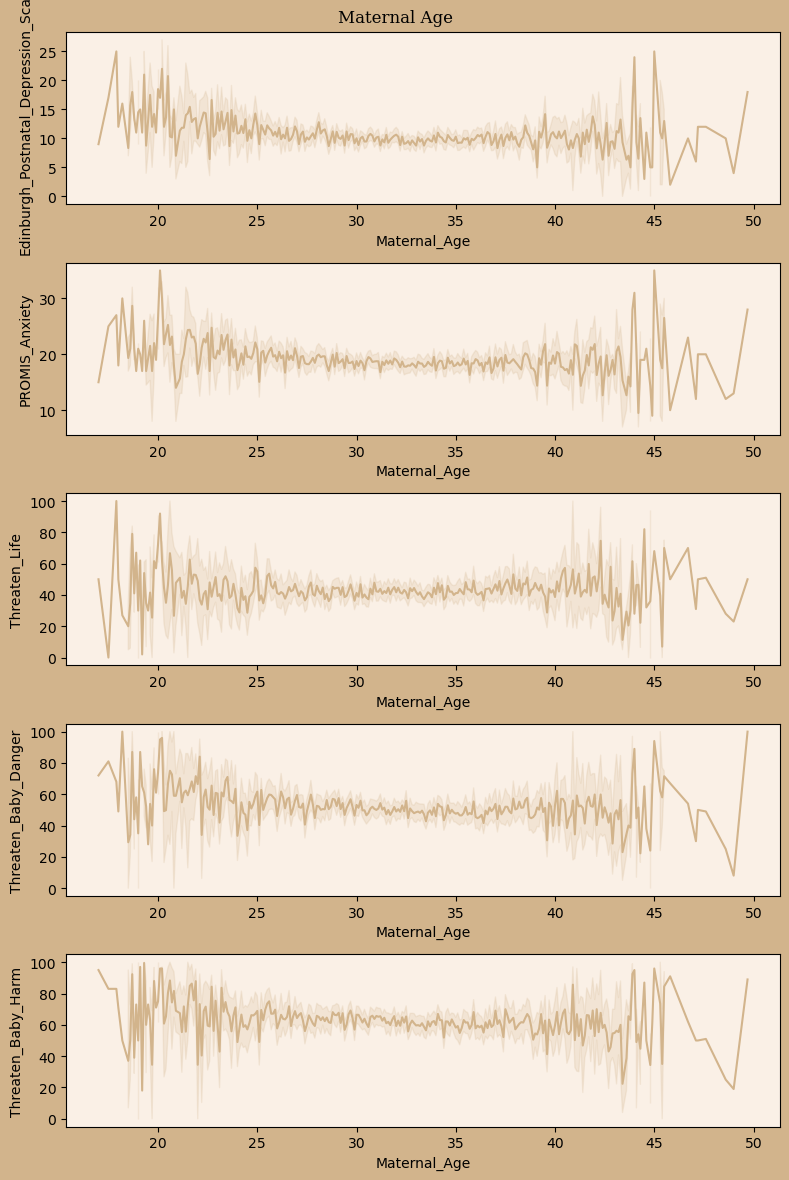

In [1048]:
# Analyse Maternal age and other Probelms
fig, ax = plt.subplots(5,1,figsize=(8,12),facecolor='tan')
ax = ax.ravel()
for i,feature in enumerate(numerical_columns):
    sns.lineplot(data=df,x='Maternal_Age',y=feature,ax=ax[i],color='tan')
    ax[i].set_facecolor('linen')
fig.suptitle('Maternal Age',fontdict={'fontfamily':'serif'})
plt.tight_layout()

In [1054]:
pd.crosstab(df['Delivery_Mode'],df['NICU_Stay'],normalize='index')

NICU_Stay                            No       Yes
Delivery_Mode                                    
Caesarean-section (c-section)  0.851542  0.148458
Vaginally                      0.922872  0.077128

In [1056]:
# There is a almost 15% increase in Nicu admission if the delivery mode is C-section

In [1060]:
pd.crosstab(df['Maternal_age_cat'],df['NICU_Stay'])

NICU_Stay           No  Yes
Maternal_age_cat           
Healthyage        4308  456
Overage            443   61
Underage            32    3

In [1062]:
#A normal birth weight for a baby is between 2.5 and 4.5 kilograms (kg), with an average of 3.5 kg

Maternal_Age     Household_Income    Maternal_Education  \
OSF_ID                                                            
1               38.3            $200,000+        Masters degree   
2               34.6            $200,000+  Undergraduate degree   
4               28.8   $100,000 -$124,999        Masters degree   
5               36.5      $40,000-$69,999  Undergraduate degree   
6               38.3  $150,000 - $174,999  Undergraduate degree   
...              ...                  ...                   ...   
10767           32.7      $70,000-$99,999   High school diploma   
10768           38.3   $100,000 -$124,999  Undergraduate degree   
10770           27.7     $20,000- $39,999  College/trade school   
10771           23.0     $20,000- $39,999  College/trade school   
10772           34.6      $70,000-$99,999        Masters degree   

        Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
OSF_ID                                                         
1                                        9.0            13.0   
2                                        4.0            17.0   
4                                        9.0            20.0   
5                                       14.0            20.0   
6                                        3.0             8.0   
...                                      ...             ...   
10767                                   15.0            27.0   
10768                                   10.0            18.0   
10770                                    4.0            15.0   
10771                                   12.0            19.0   
10772                                   18.0            30.0   

        Gestational_Age_At_Birth  Birth_Length  Birth_Weight  \
OSF_ID                                                         
1                            9.0         49.20        3431.0   
2                            NaN           NaN           NaN   
4                            9.0         41.00        2534.0   
5                            9.0         53.34        3714.0   
6                            9.0           NaN           NaN   
...                          ...           ...           ...   
10767                        NaN           NaN           NaN   
10768                        NaN           NaN           NaN   
10770                        NaN           NaN           NaN   
10771                        NaN           NaN           NaN   
10772                        9.0           NaN        4196.0   

                        Delivery_Mode NICU_Stay Language  Threaten_Life  \
OSF_ID                                                                    
1                           Vaginally        No  English            2.0   
2                                 NaN       NaN  English            2.0   
4                           Vaginally        No   French           53.0   
5       Caesarean-section (c-section)        No  English           23.0   
6                                 NaN       NaN  English           29.0   
...                               ...       ...      ...            ...   
10767                             NaN       NaN  English           54.0   
10768                             NaN       NaN  English           54.0   
10770                             NaN       NaN   French           21.0   
10771                             NaN       NaN  English           65.0   
10772                             NaN       NaN  English           84.0   

        Threaten_Baby_Danger  Threaten_Baby_Harm Delivary_month Delivary_year  \
OSF_ID                                                                          
1                        3.0                27.0            Dec          2020   
2                       33.0                92.0            NaN           NaN   
4                       67.0                54.0            Dec          2020   
5                       32.0                71.0            Oct          2020   
6       

In [1086]:
df['Birth_Weight'] = df['Birth_Weight']/1000

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1864\838061957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Birth_Weight'] = df['Birth_Weight']/1000


In [1129]:
df['Birth_Weight_cat'] = df['Birth_Weight'].apply(lambda x:'unhealthy' if x<2.5 or x>4.5 else 'healthy')

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1864\1191888920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Birth_Weight_cat'] = df['Birth_Weight'].apply(lambda x:'unhealthy' if x<2.5 or x>4.5 else 'healthy')


(1.0, 50.0)

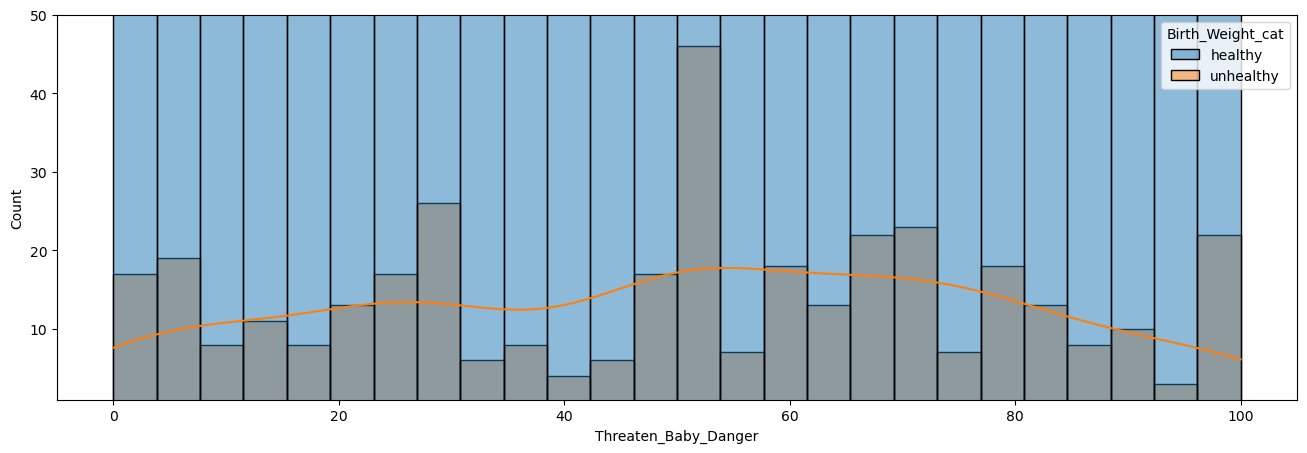

In [1139]:
plt.figure(figsize=(16,5))
sns.histplot(x=df['Threaten_Baby_Danger'],fill=True,hue=df['Birth_Weight_cat'],kde=True)
plt.ylim(1,50)